# Kaggle diabetes prediction challenge: Submission template

Our lesson 20: classification activity will use an active Kaggle playground competition. Playground competitions run every month and highlight interesting/approachable datasets for the ML community to practice skills on a variety of ML problem types without the pressure, complexity and long duration of prize money competitions. 

It just so happens that this month's playground competition is a classification challenge! See the full competition details here: [Playground Series - Season 5, Episode 12: Diabetes Prediction Challenge](https://www.kaggle.com/competitions/playground-series-s5e12)

This notebook template will help you make your first Kaggle competition submission. It is pre-filled with code to load the competition data and output random predictions (see section 5. Submission below). This will score ~0.50 on the Kaggle public leaderboard. Your job is to improve that score with EDA, clever feature engineering and good model optimization. Good luck!

## How to submit on Kaggle

**1. Upload this notebook to Kaggle:**
   - Create a Kaggle account and log in to [kaggle](https://www.kaggle.com)
   - Click '+ Create' in the left navigation menu
   - Select 'Import Notebook' and upload this file (or link to GitHub)

**2. Start the notebook:**
   - Find your uploaded notebook in your Kaggle account under 'Code'
   - Click on the notebook to open it
   - The notebook will open in edit mode - you can now run cells and make changes

**3. Add the competition dataset:**
   - From the notebook environment, in the right sidebar, click the 'Input' tab
   - Click '+ Add Input' → filter by 'Competition Datasets'
   - Find 'Diabetes Prediction Challenge' and click the '+' icon
   - Note: You must join the competition first (click 'Join Competition' on the competition page)

**4. Access the data:**
   - Once added, the data is available at `/kaggle/input/playground-series-s5e12/`
   - Files: `train.csv` (training data with labels), `test.csv` (test data without labels), `sample_submission.csv` (submission format example)

**5. Make your submission:**
   - Your notebook must output test set predictions to `submission.csv` in the correct format
   - Go to 'Submit to competition' tab in the right sidebar and click 'Submit'

**Note:** This notebook uses a `KAGGLE` flag (under 'Run configuration') to switch between Kaggle and local file paths. Set it to `True` when running on Kaggle, or `False` when running locally with data in a `../data/` directory.

## Notebook set-up

### Imports

In [149]:
# Standard library imports
from pathlib import Path

# Third party imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate
from sklearn.metrics import root_mean_squared_error, ConfusionMatrixDisplay, confusion_matrix

### Run configuration

In [50]:
# Set to True when running on Kaggle, False when running locally
KAGGLE = False

### Data loading

In [51]:
# Set file paths based on environment
if KAGGLE:
    # Kaggle paths - data is in /kaggle/input/
    train_df_path = '/kaggle/input/playground-series-s5e12/train.csv'
    test_df_path = '/kaggle/input/playground-series-s5e12/test.csv'

else:
    # Otherwise, load data from course GitHub repository
    train_df_path = 'https://gperdrizet.github.io/FSA_devops/assets/data/unit3/diabetes_prediction_train.csv'
    test_df_path = 'https://gperdrizet.github.io/FSA_devops/assets/data/unit3/diabetes_prediction_test.csv'

# Load the training and testing datasets
train_df = pd.read_csv(train_df_path)
test_df = pd.read_csv(test_df_path)

# Display first few rows of training data
pd.set_option('display.max_columns', None)
train_df.head()

id  age  alcohol_consumption_per_week  physical_activity_minutes_per_week  \
0   0   31                             1                                  45   
1   1   50                             2                                  73   
2   2   32                             3                                 158   
3   3   54                             3                                  77   
4   4   54                             1                                  55   

   diet_score  sleep_hours_per_day  screen_time_hours_per_day   bmi  \
0         7.7                  6.8                        6.1  33.4   
1         5.7                  6.5                        5.8  23.8   
2         8.5                  7.4                        9.1  24.1   
3         4.6                  7.0                        9.2  26.6   
4         5.7                  6.2                        5.1  28.8   

   waist_to_hip_ratio  systolic_bp  diastolic_bp  heart_rate  \
0                0.93          112            70          62   
1                0.83          120            77          71   
2                0.83           95            89          73   
3                0.83          121            69          74   
4                0.90          108            60          85   

   cholesterol_total  hdl_cholesterol  ldl_cholesterol  triglycerides  gender  \
0                199               58              114            102  Female   
1                199               50              121            124  Female   
2                188               59              114            108    Male   
3                182               54               85            123  Female   
4                206               49              131            124    Male   

  ethnicity education_level  income_level smoking_status employment_status  \
0  Hispanic      Highschool  Lower-Middle        Current          Employed   
1     White      Highschool  Upper-Middle          Never          Employed   
2  Hispanic      Highschool  Lower-Middle          Never           Retired   
3     White      Highschool  Lower-Middle        Current          Employed   
4     White      Highschool  Upper-Middle          Never           Retired   

   family_history_diabetes  hypertension_history  cardiovascular_history  \
0                        0                     0                       0   
1                        0                     0                       0   
2                        0                     0                       0   
3                        0                     1                       0   
4                        0                     1                       0   

   diagnosed_diabetes  
0                 1.0  
1                 1.0  
2                 0.0  
3                 1.0  
4                 1.0

In [52]:
# Display dataset information (columns, dtypes, non-null counts)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

## 1. EDA

- Graph our data
- Start with looking at Diet score, this could be the biggest indicator
- Next see average cholesterol_total of people with diabetes
- Family history would be a good indicator with higher weight of yes to diabetes

In [53]:
train_df.describe()

id            age  alcohol_consumption_per_week  \
count  700000.000000  700000.000000                 700000.000000   
mean   349999.500000      50.359734                      2.072411   
std    202072.738554      11.655520                      1.048189   
min         0.000000      19.000000                      1.000000   
25%    174999.750000      42.000000                      1.000000   
50%    349999.500000      50.000000                      2.000000   
75%    524999.250000      58.000000                      3.000000   
max    699999.000000      89.000000                      9.000000   

       physical_activity_minutes_per_week     diet_score  sleep_hours_per_day  \
count                       700000.000000  700000.000000        700000.000000   
mean                            80.230803       5.963695             7.002200   
std                             51.195071       1.463336             0.901907   
min                              1.000000       0.100000             3.100000   
25%                             49.000000       5.000000             6.400000   
50%                             71.000000       6.000000             7.000000   
75%                             96.000000       7.000000             7.600000   
max                            747.000000       9.900000             9.900000   

       screen_time_hours_per_day            bmi  waist_to_hip_ratio  \
count              700000.000000  700000.000000       700000.000000   
mean                    6.012733      25.874684            0.858766   
std                     2.022707       2.860705            0.037980   
min                     0.600000      15.100000            0.680000   
25%                     4.600000      23.900000            0.830000   
50%                     6.000000      25.900000            0.860000   
75%                     7.400000      27.800000            0.880000   
max                    16.500000      38.400000            1.050000   

         systolic_bp   diastolic_bp     heart_rate  cholesterol_total  \
count  700000.000000  700000.000000  700000.000000      700000.000000   
mean      116.294193      75.440924      70.167749         186.818801   
std        11.010390       6.825775       6.938722          16.730832   
min        91.000000      51.000000      42.000000         117.000000   
25%       108.000000      71.000000      65.000000         175.000000   
50%       116.000000      75.000000      70.000000         187.000000   
75%       124.000000      80.000000      75.000000         199.000000   
max       163.000000     104.000000     101.000000         289.000000   

       hdl_cholesterol  ldl_cholesterol  triglycerides  \
count    700000.000000    700000.000000  700000.000000   
mean         53.823214       102.905854     123.081850   
std           8.266545        19.022416      24.739397   
min          21.000000        51.000000      31.000000   
25%          48.000000        89.000000     106.000000   
50%          54.000000       103.000000     123.000000   
75%          59.000000       116.000000     139.000000   
max          90.000000       205.000000     290.000000   

       family_history_diabetes  hypertension_history  cardiovascular_history  \
count            700000.000000         700000.000000           700000.000000   
mean                  0.149401              0.181990                0.030324   
std                   0.356484              0.385837                0.171478   
min                   0.000000              0.000000                0.000000   
25%                   0.000000              0.000000                0.000000   
50%                   0.000000              0.000000                0.000000   
75%                   0.000000              0.000000                0.000000   
max                   1.000000              1.000000                1.000000   

       diagnosed_diabetes  
count       700000.000000  
mean             0.623296  
std              0.484560  
min         

In [60]:
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns.to_list()

# family_history_diabetes, hypertension_history, cardiovascular_history are bool flags we dont need these
# we can also ignore ID since it is just an identifier
# diagnosed_diabetes is our target so we remove this for comparison
removed_items = ['family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'id', 'diagnosed_diabetes']
numerical_features = [item for item in numerical_features if item not in removed_items]

train_df[numerical_features]

age  alcohol_consumption_per_week  physical_activity_minutes_per_week  \
0        31                             1                                  45   
1        50                             2                                  73   
2        32                             3                                 158   
3        54                             3                                  77   
4        54                             1                                  55   
...     ...                           ...                                 ...   
699995   29                             1                                  59   
699996   46                             2                                  72   
699997   35                             1                                  50   
699998   49                             2                                  70   
699999   42                             4                                  56   

        diet_score  sleep_hours_per_day  screen_time_hours_per_day   bmi  \
0              7.7                  6.8                        6.1  33.4   
1              5.7                  6.5                        5.8  23.8   
2              8.5                  7.4                        9.1  24.1   
3              4.6                  7.0                        9.2  26.6   
4              5.7                  6.2                        5.1  28.8   
...            ...                  ...                        ...   ...   
699995         6.9                  5.2                        1.5  26.1   
699996         7.7                  7.7                        3.8  25.5   
699997         5.6                  6.1                        6.4  26.9   
699998         5.7                  6.9                        4.7  25.2   
699999         4.2                  7.0                        6.1  28.3   

        waist_to_hip_ratio  systolic_bp  diastolic_bp  heart_rate  \
0                     0.93          112            70          62   
1                     0.83          120            77          71   
2                     0.83           95            89          73   
3                     0.83          121            69          74   
4                     0.90          108            60          85   
...                    ...          ...           ...         ...   
699995                0.88          133            57          69   
699996                0.85          106            85          65   
699997                0.88          127            84          63   
699998                0.86          116            67          69   
699999                0.90           99            73          74   

        cholesterol_total  hdl_cholesterol  ldl_cholesterol  triglycerides  
0                     199               58              114            102  
1                     199               50              121            124  
2                     188               59              114            108  
3                     182               54               85            123  
4                     206               49              131            124  
...                   ...              ...              ...            ...  
699995                163               58               90            126  
699996                188               45              107            119  
699997                168               59               77            166  
699998                198               55              108            133  
699999                191               63              105            159  

[700000 rows x 15 columns]

### Comparison Graphs (CAREFUL! long run time)

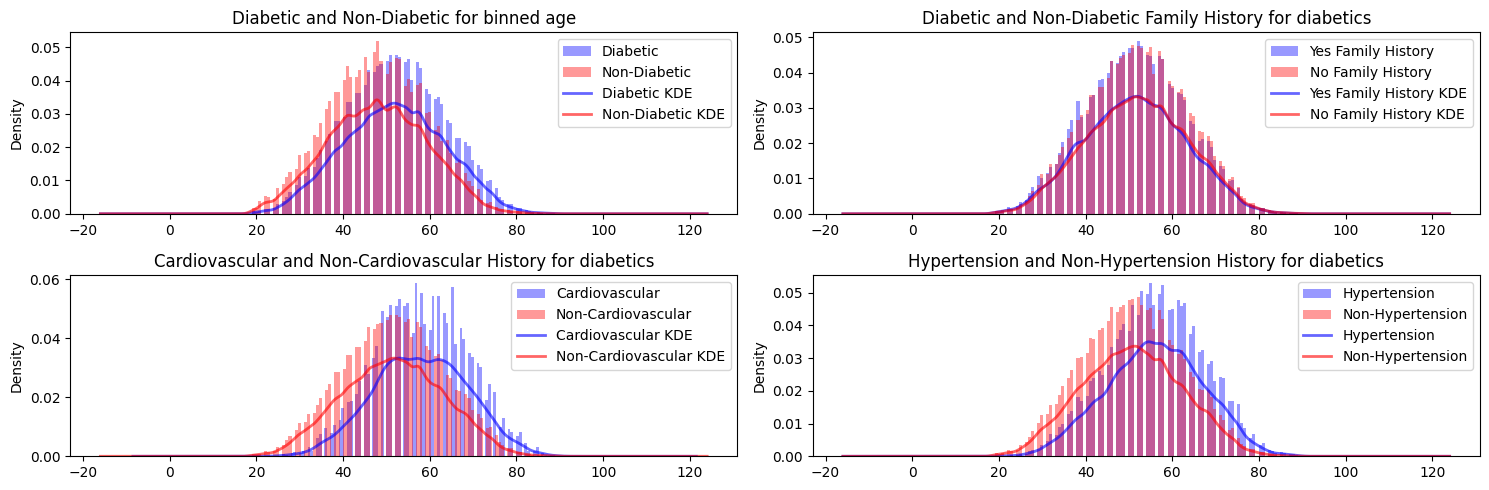

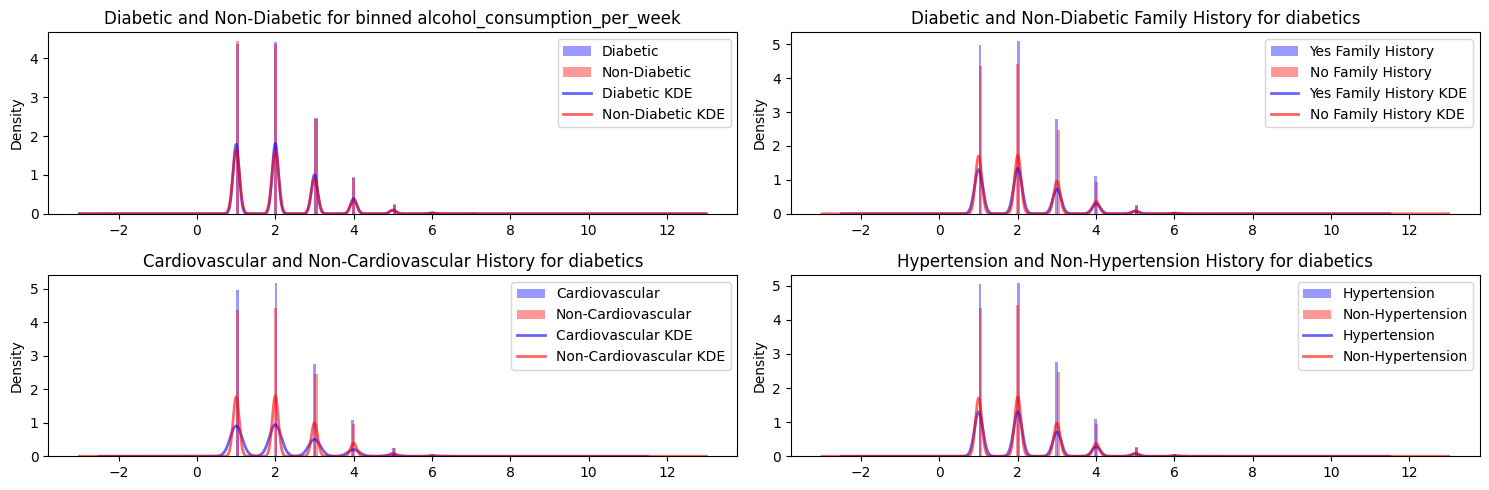

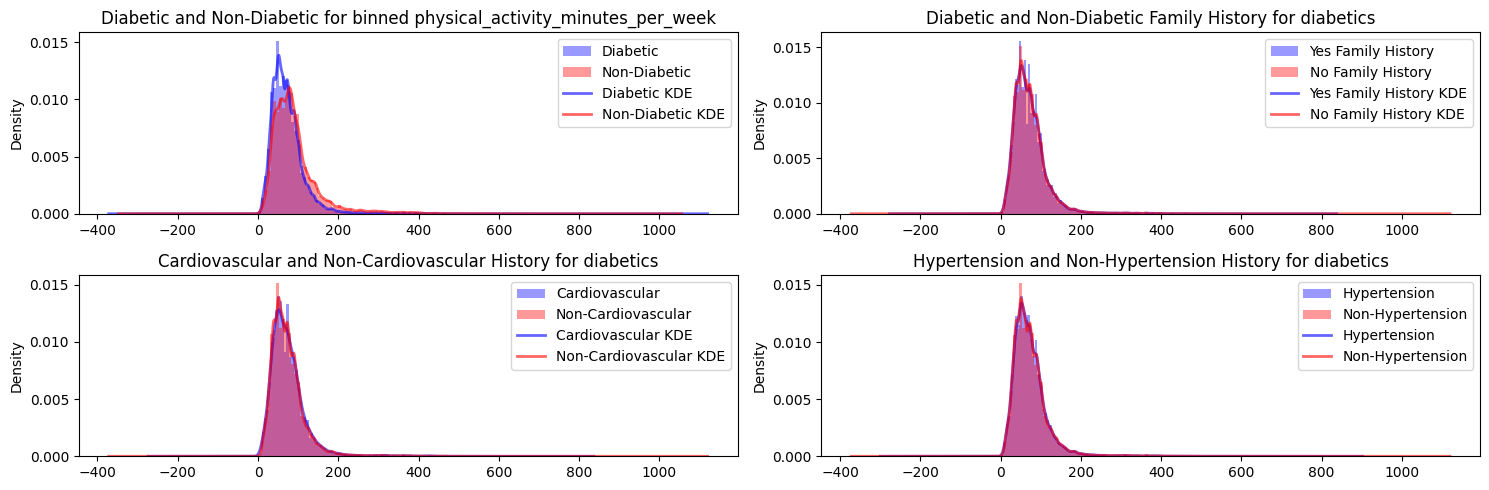

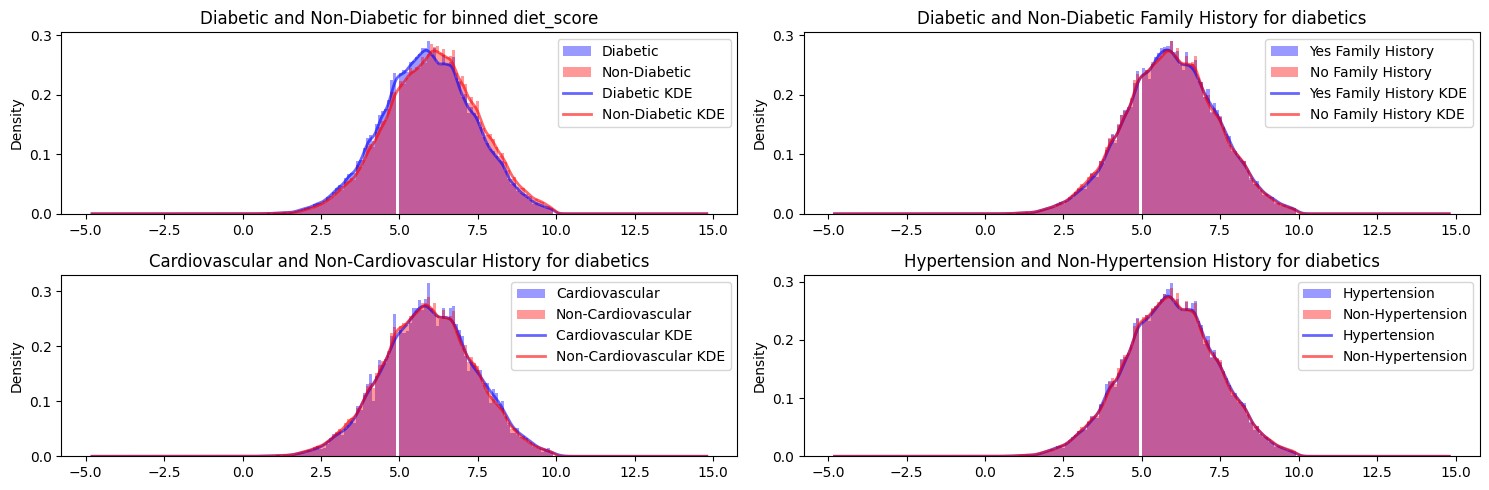

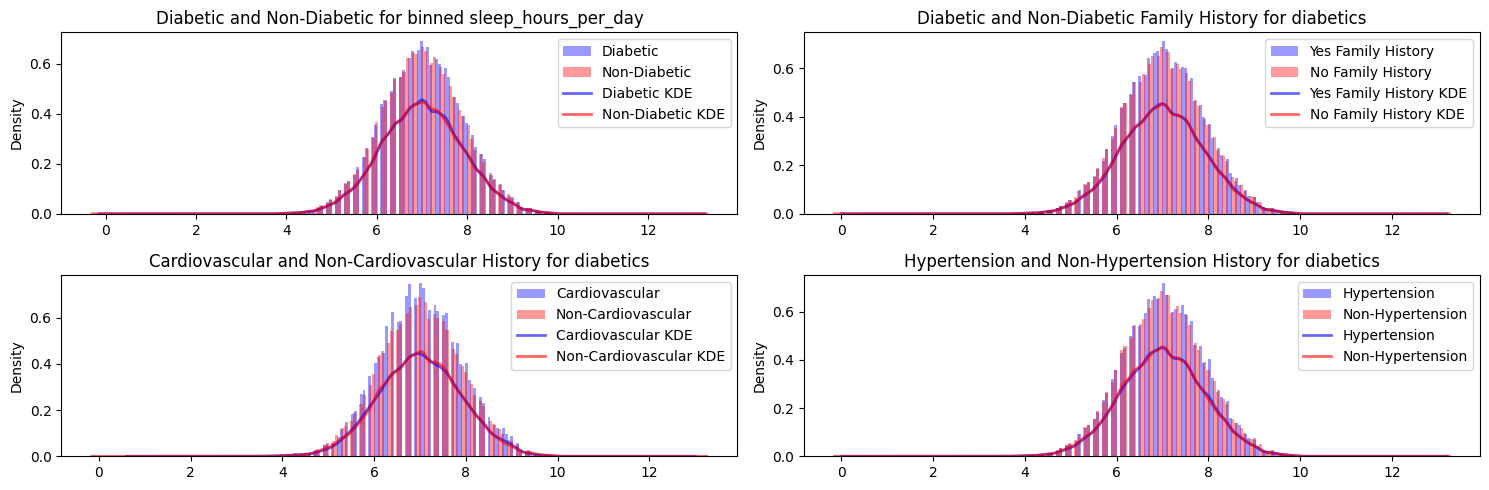

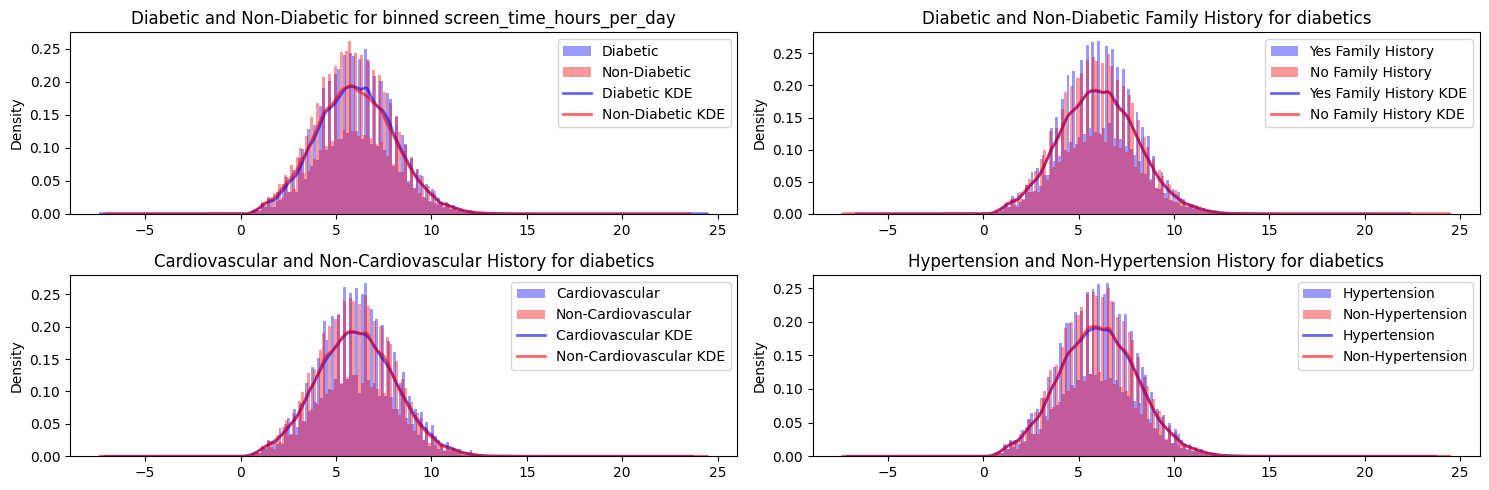

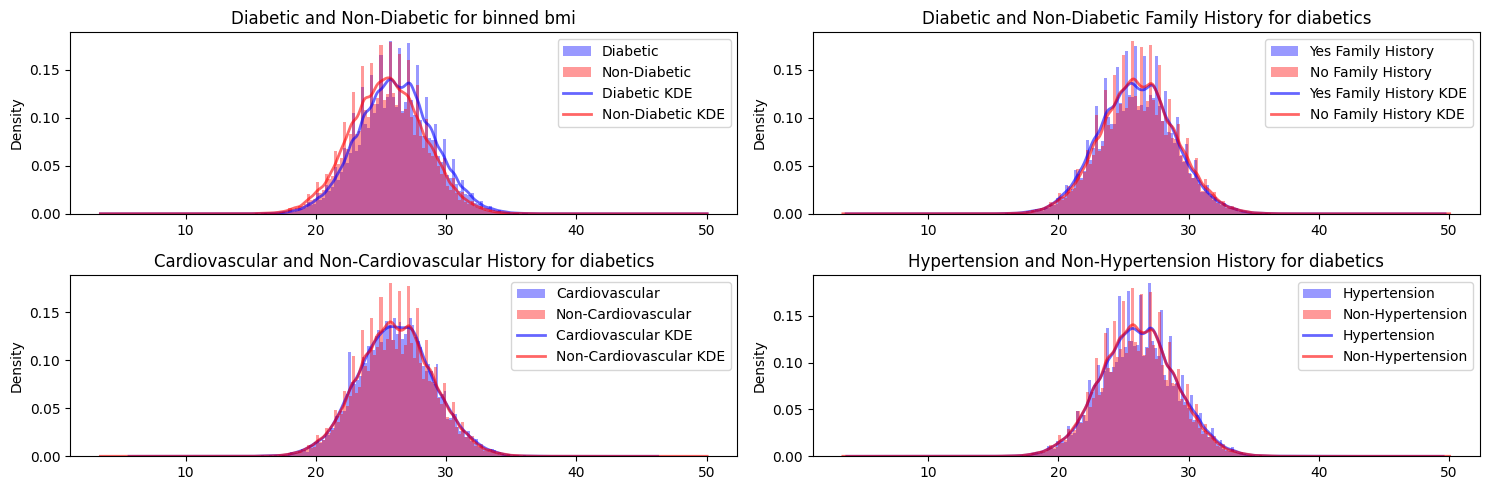

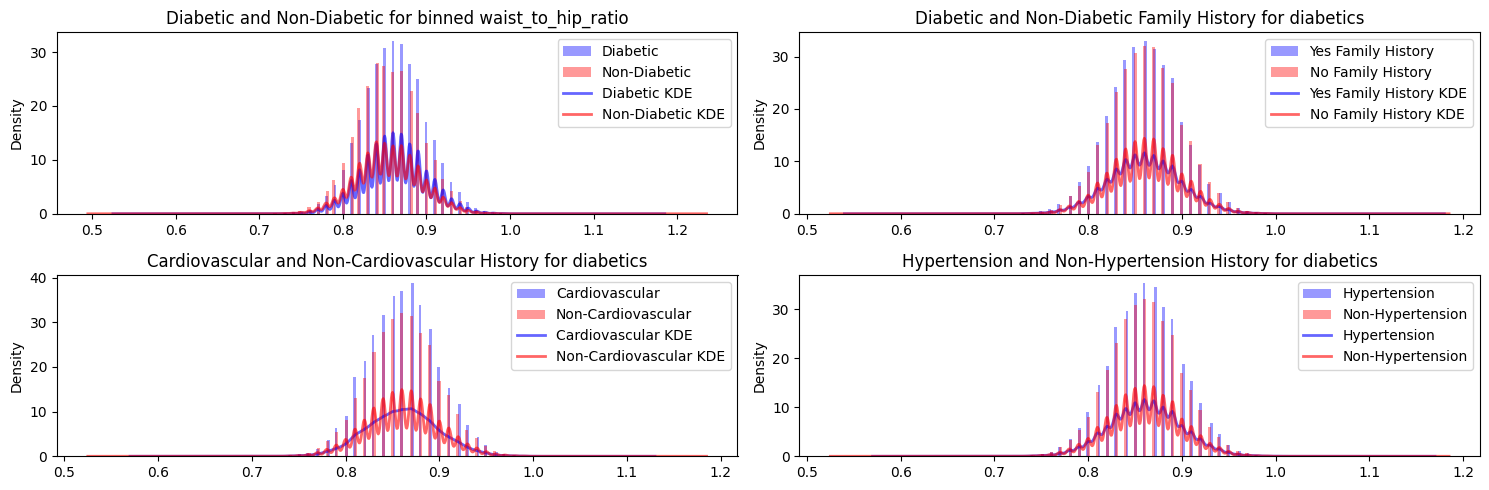

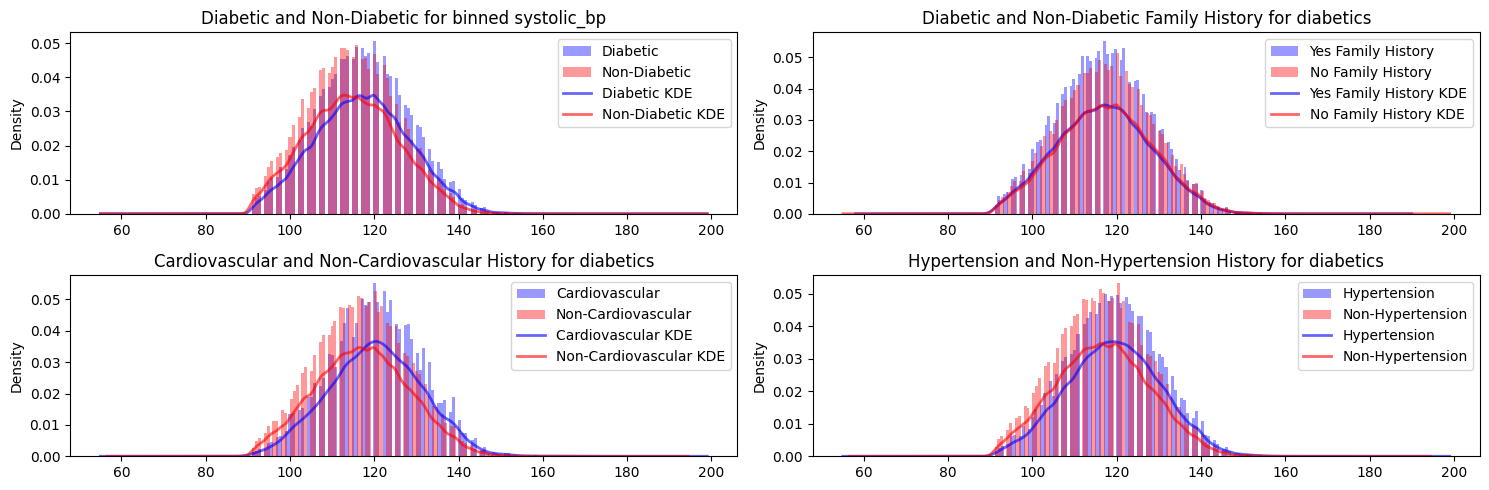

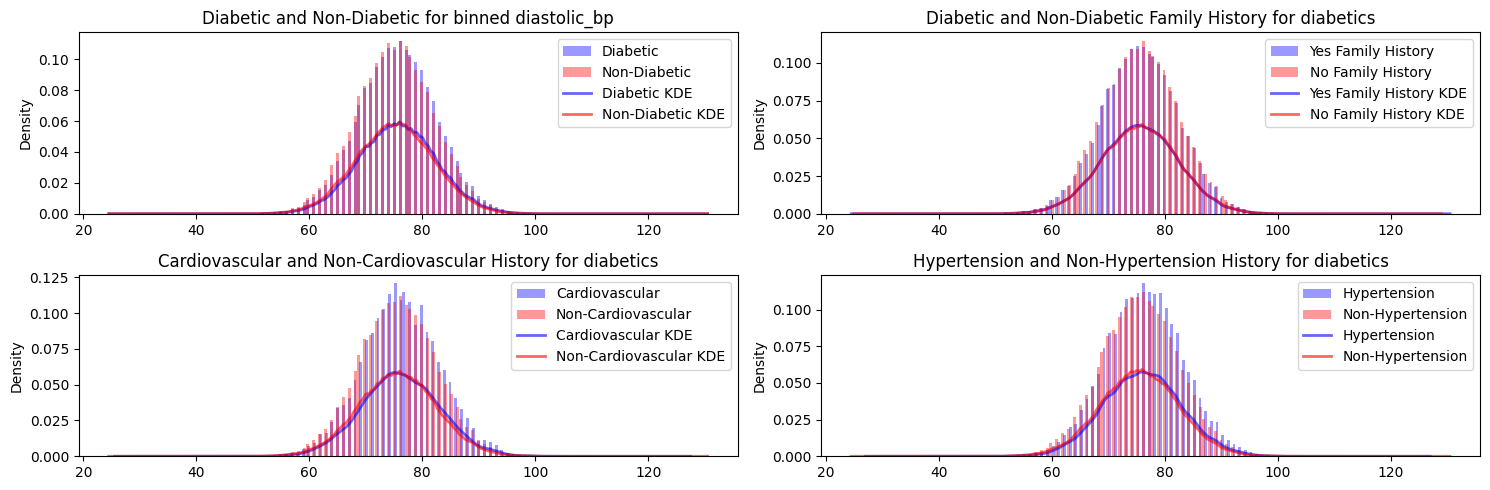

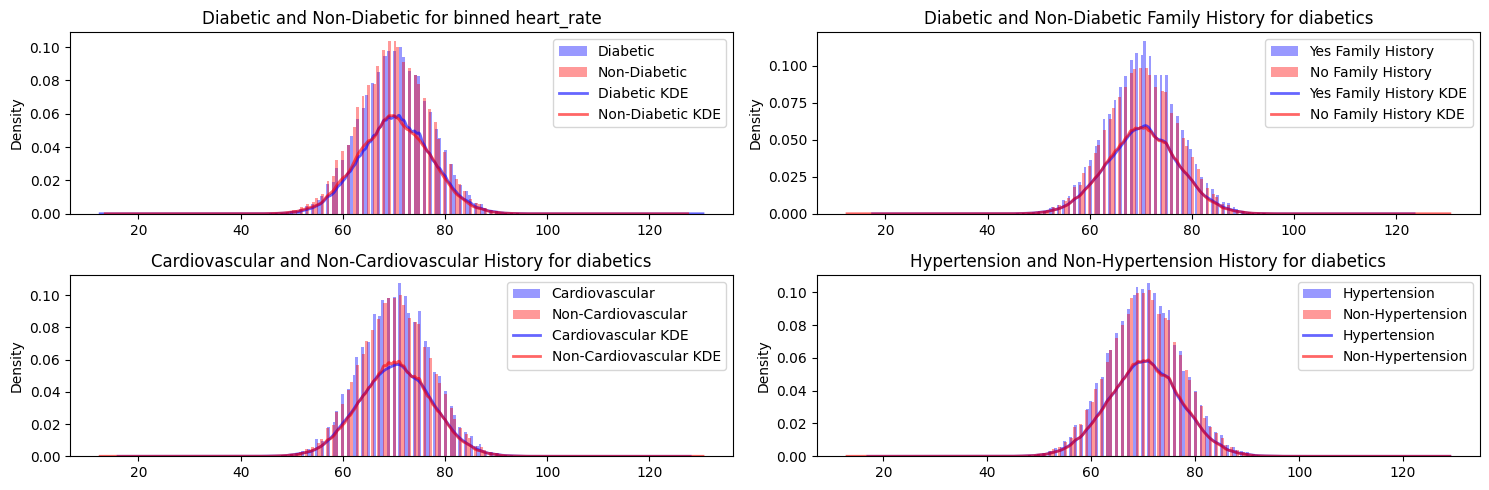

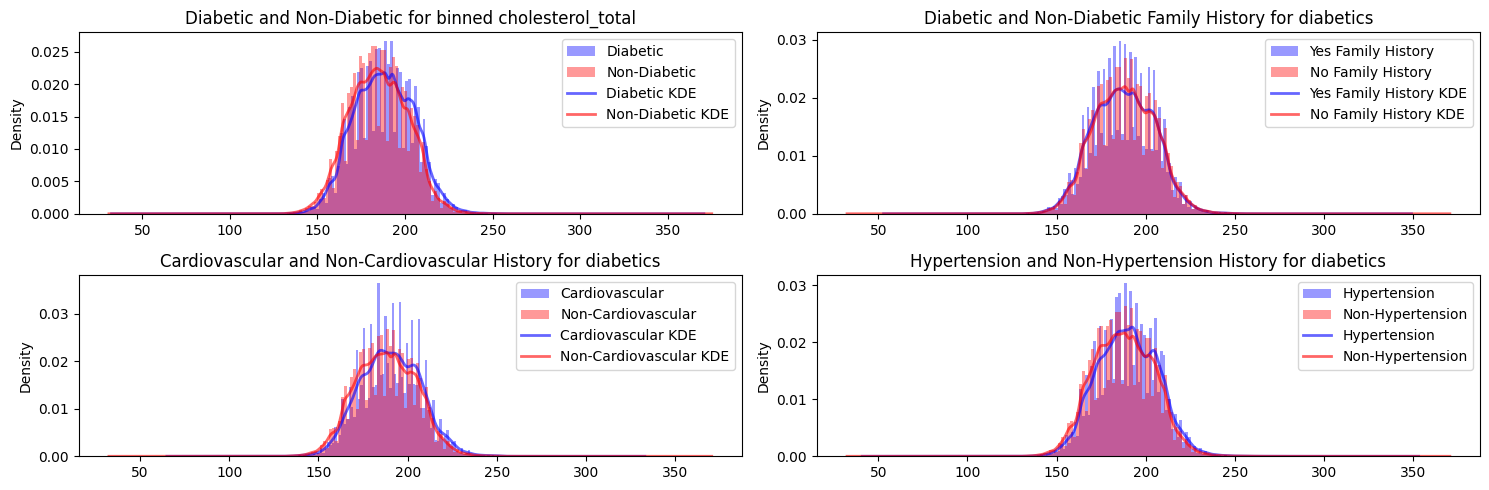

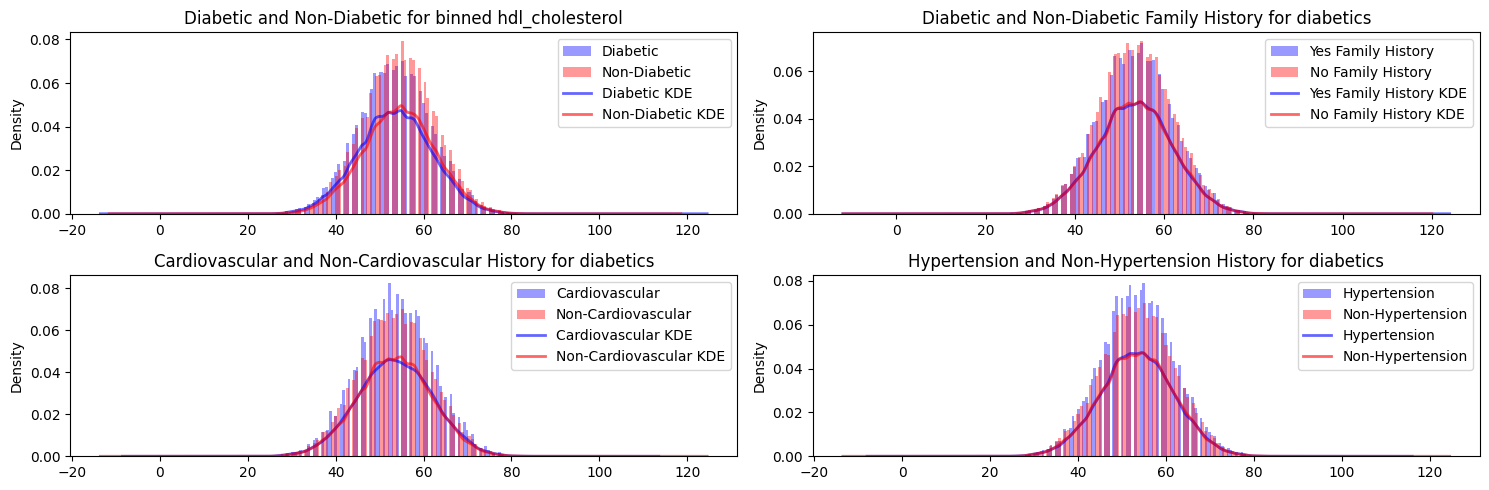

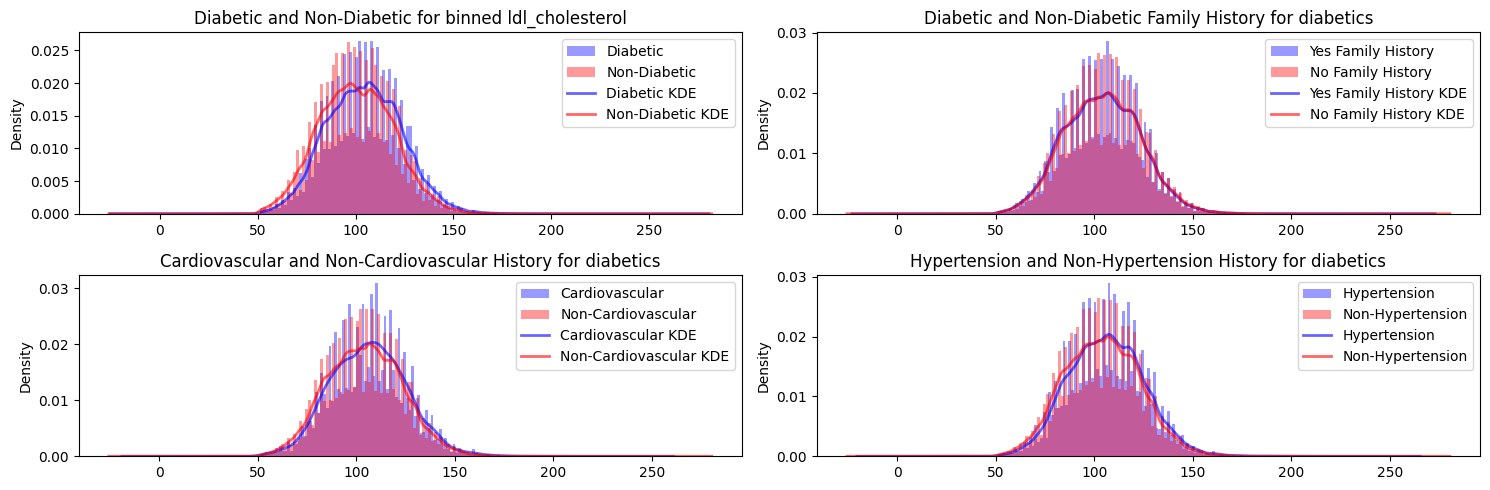

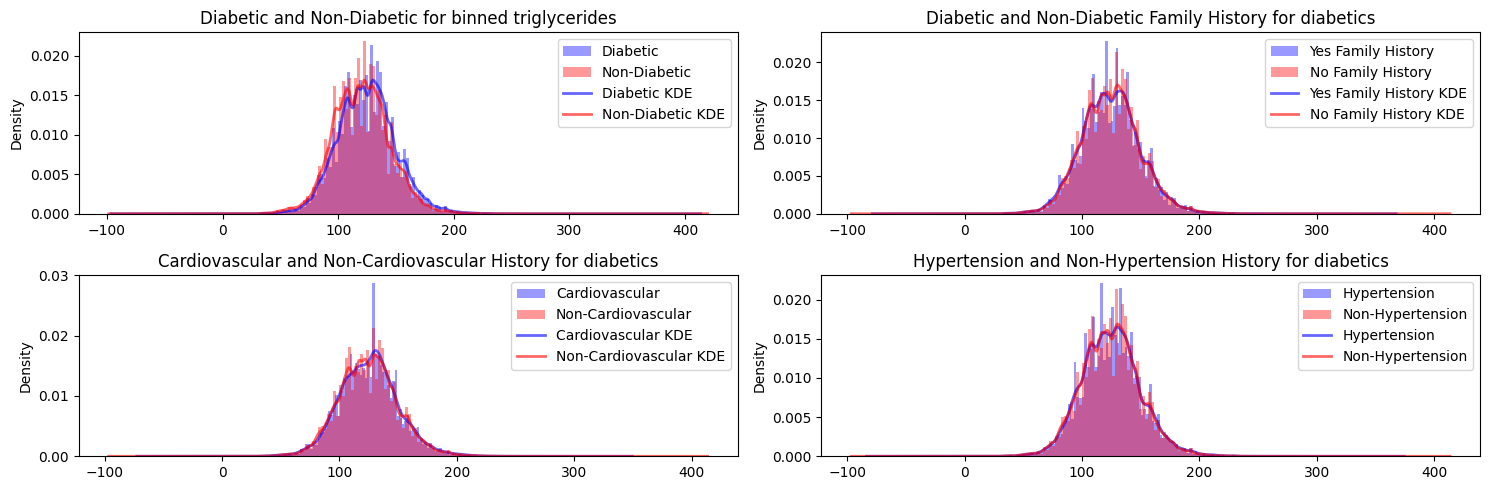

In [ ]:
if not KAGGLE:
    #compare diabetics to non-diabetics 
    is_diabetic_df = train_df[train_df['diagnosed_diabetes'] == 1]
    non_diabetic_df = train_df[train_df['diagnosed_diabetes'] == 0]

    #compare family history of diabetes
    is_family_history_df = is_diabetic_df[is_diabetic_df['family_history_diabetes'] == 1]
    non_family_history_df = is_diabetic_df[is_diabetic_df['family_history_diabetes'] == 0]

    #compare cardiovascular history 
    is_cardiovascular_df = is_diabetic_df[is_diabetic_df['cardiovascular_history'] == 1]
    non_cardiovascular_df = is_diabetic_df[is_diabetic_df['cardiovascular_history'] == 0]

    #compare hypertension history 
    is_hypertension_df = is_diabetic_df[is_diabetic_df['hypertension_history'] == 1]
    non_hypertension_df = is_diabetic_df[is_diabetic_df['hypertension_history'] == 0]

    for feature in numerical_features:
        fig, axes = plt.subplots(2, 2, figsize=(15, 5))

        #Plot for diabetic vs non-diabetic
        axes[0][0].hist(data=is_diabetic_df, x=feature, bins=100, color='blue', alpha=0.4, label='Diabetic', density=True)
        axes[0][0].hist(data=non_diabetic_df, x=feature, bins=100, color='red', alpha=0.4, label='Non-Diabetic', density=True)
        is_diabetic_df[feature].plot(kind='density', ax=axes[0][0], linewidth=2, color='blue', alpha=0.6, label='Diabetic KDE')
        non_diabetic_df[feature].plot(kind='density', ax=axes[0][0], linewidth=2, color='red', alpha=0.6, label='Non-Diabetic KDE')
        axes[0][0].legend()

        #plot for family history of diabetes comparison 
        axes[0][1].hist(data=is_family_history_df, x=feature, bins=100, color='blue', alpha=0.4, label='Yes Family History', density=True)
        axes[0][1].hist(data=non_family_history_df, x=feature, bins=100, color='red', alpha=0.4, label='No Family History', density=True)
        is_family_history_df[feature].plot(kind='density', ax=axes[0][1], linewidth=2, color='blue', alpha=0.6, label='Yes Family History KDE')
        non_family_history_df[feature].plot(kind='density', ax=axes[0][1], linewidth=2, color='red', alpha=0.6, label='No Family History KDE')
        axes[0][1].legend()

        #plot for cardiovascular history
        axes[1][0].hist(data=is_cardiovascular_df, x=feature, bins=100, color='blue', alpha=0.4, label='Cardiovascular', density=True)
        axes[1][0].hist(data=non_cardiovascular_df, x=feature, bins=100, color='red', alpha=0.4, label='Non-Cardiovascular', density=True)
        is_cardiovascular_df[feature].plot(kind='density', ax=axes[1][0], linewidth=2, color='blue', alpha=0.6, label='Cardiovascular KDE')
        non_cardiovascular_df[feature].plot(kind='density', ax=axes[1][0], linewidth=2, color='red', alpha=0.6, label='Non-Cardiovascular KDE')
        axes[1][0].legend()

        #plot for hypertension history
        axes[1][1].hist(data=is_hypertension_df, x=feature, bins=100, color='blue', alpha=0.4, label='Hypertension', density=True)
        axes[1][1].hist(data=non_hypertension_df, x=feature, bins=100, color='red', alpha=0.4, label='Non-Hypertension', density=True)
        is_hypertension_df[feature].plot(kind='density', ax=axes[1][1], linewidth=2, color='blue', alpha=0.6, label='Hypertension')
        non_hypertension_df[feature].plot(kind='density', ax=axes[1][1], linewidth=2, color='red', alpha=0.6, label='Non-Hypertension')
        axes[1][1].legend()


        axes[0][0].set_title(f'Diabetic and Non-Diabetic for binned {feature}')
        axes[0][1].set_title(f'Diabetic and Non-Diabetic Family History for diabetics')
        axes[1][0].set_title(f'Cardiovascular and Non-Cardiovascular History for diabetics')
        axes[1][1].set_title(f'Hypertension and Non-Hypertension History for diabetics')


        plt.tight_layout()
        plt.show()

Recommendations
- physical activity per week -> Log scale because right skewed
- alcohol consumption per week -> Log scale because right skewed
- everything else is mostly normalized -> standard scaler

### Correlation Map

In [71]:
corr = train_df[[
    'diagnosed_diabetes',
    'cardiovascular_history',
    'hypertension_history',
    'family_history_diabetes',
    *numerical_features,
]].corr(method='spearman')

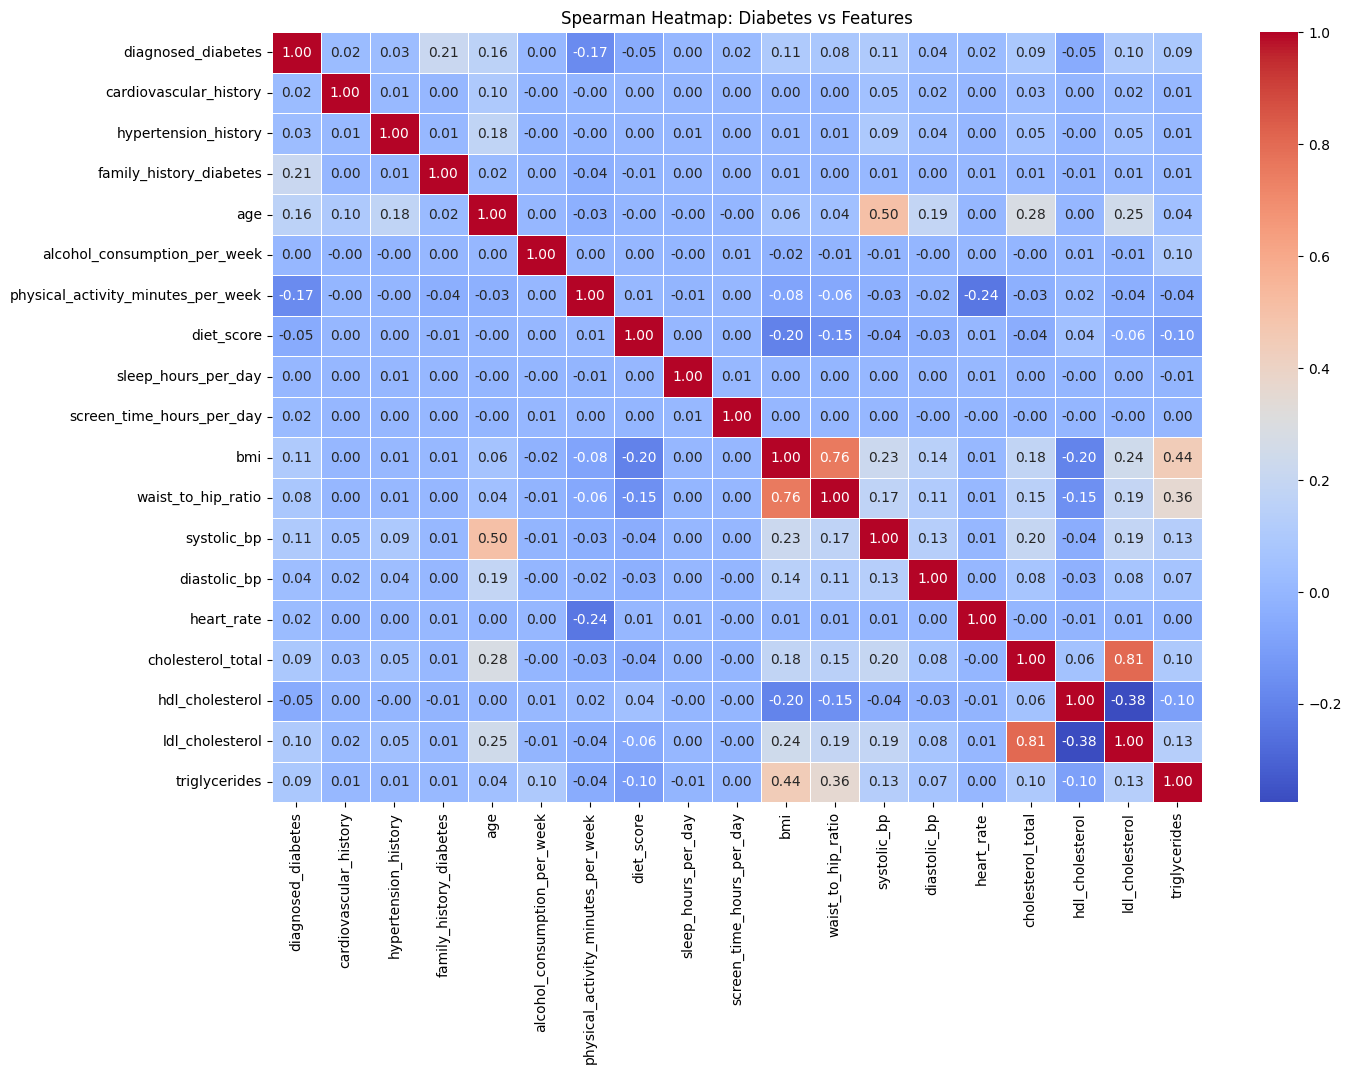

In [114]:
if not KAGGLE:
    plt.figure(figsize=(15,10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
    plt.title('Spearman Heatmap: Diabetes vs Features')

    plt.show()

In [75]:
corr = train_df[[
    'diagnosed_diabetes',
    'cardiovascular_history',
    'hypertension_history',
    'family_history_diabetes',
    *numerical_features,
]].corr()

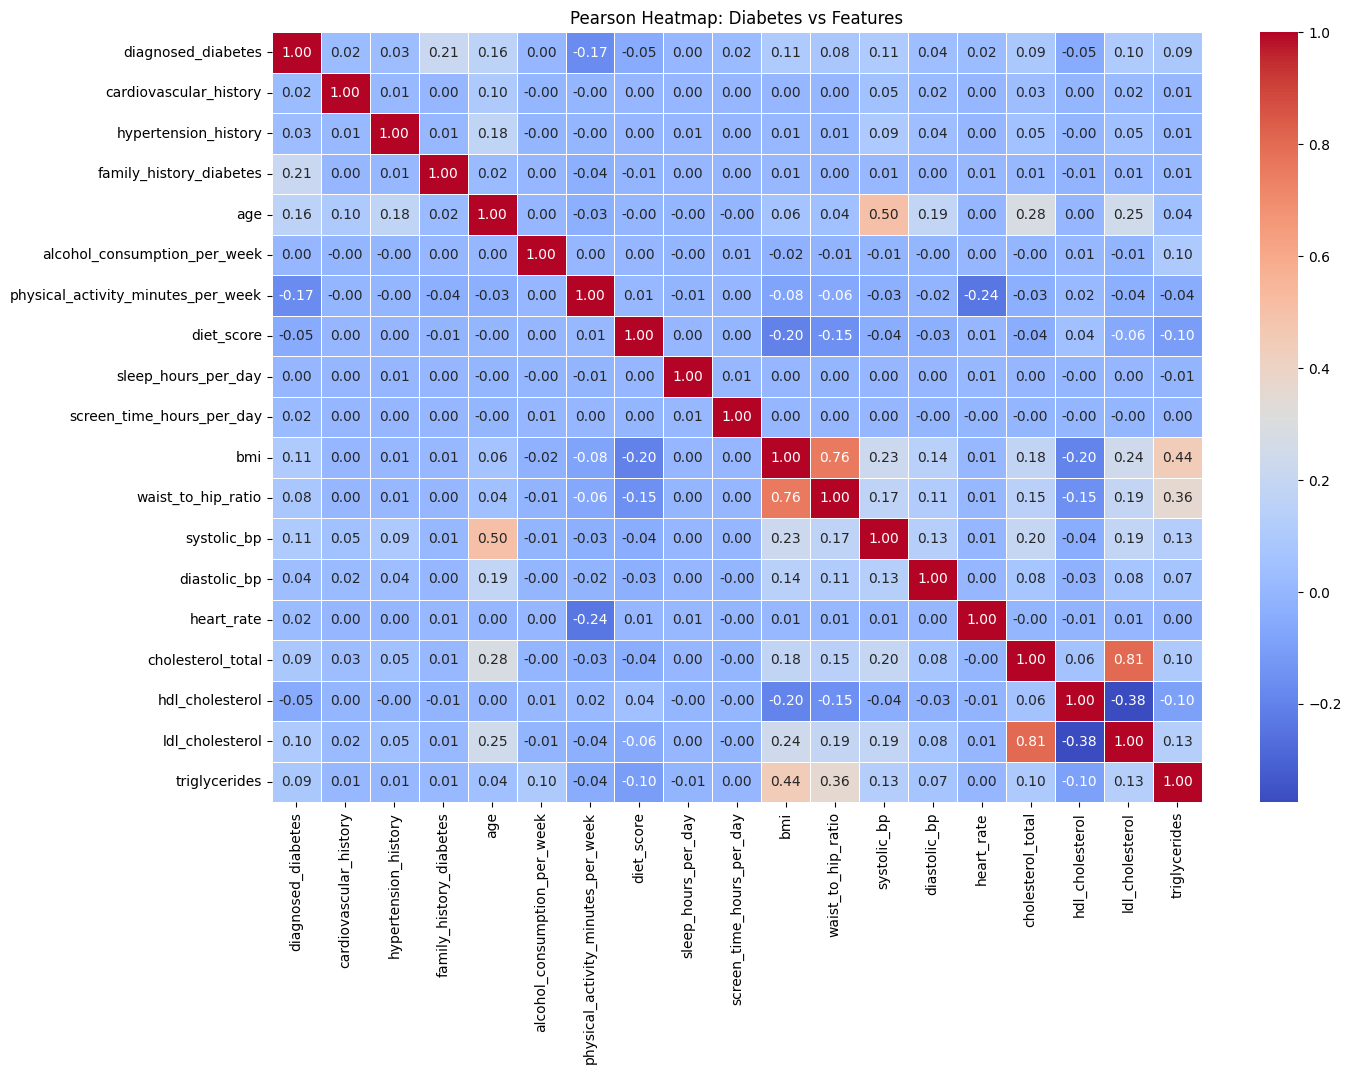

In [ ]:
if not KAGGLE:
    plt.figure(figsize=(15,10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
    plt.title('Pearson Heatmap: Diabetes vs Features')

    plt.show()

Worth noting that the highest correlations with diagnosed diabetes seems to be physical_activity_minutes_per_week, age, and family_history_diabetes. Where as diabetes increases the number of minutes per week of exercise decreases. As for the other two age and family history increases as diabetic numbers go up. This makes sense from a general standpoint, we can lean on this.

## 2. Feature engineering

### Scaling Log

In [ ]:
train_df['physical_activity_minutes_per_week'] = np.log1p(train_df['physical_activity_minutes_per_week'])
train_df['alcohol_consumption_per_week'] = np.log1p(train_df['alcohol_consumption_per_week'])

### Category Encoding

In [64]:
#encode categories gender, ethnicity, education_level, income_level, smoking_status, employment_status
categories = ['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status']
for feature in categories:
    print(f'{train_df[feature].value_counts()}\n')

gender
Female    363237
Male      333085
Other       3678
Name: count, dtype: int64

ethnicity
White       386153
Hispanic    129984
Black       106301
Asian        60120
Other        17442
Name: count, dtype: int64

education_level
Highschool      344145
Graduate        261268
Postgraduate     79642
No formal        14945
Name: count, dtype: int64

income_level
Middle          290557
Lower-Middle    178570
Upper-Middle    127836
Low              85803
High             17234
Name: count, dtype: int64

smoking_status
Never      494448
Current    103363
Former     102189
Name: count, dtype: int64

employment_status
Employed      516170
Retired       115735
Unemployed     49787
Student        18308
Name: count, dtype: int64



In [65]:
#encode the categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')

for category in categories:
    onehot_array = encoder.fit_transform(train_df[[category]])

    new_onehot_df = pd.DataFrame(
        onehot_array,
        columns=encoder.get_feature_names_out([category]),
        index=train_df.index
    )

    #Concat the results back into our market object
    train_df = pd.concat([train_df, new_onehot_df], axis=1)

train_df

id  age  alcohol_consumption_per_week  \
0            0   31                      0.693147   
1            1   50                      1.098612   
2            2   32                      1.386294   
3            3   54                      1.386294   
4            4   54                      0.693147   
...        ...  ...                           ...   
699995  699995   29                      0.693147   
699996  699996   46                      1.098612   
699997  699997   35                      0.693147   
699998  699998   49                      1.098612   
699999  699999   42                      1.609438   

        physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  \
0                                 3.828641         7.7                  6.8   
1                                 4.304065         5.7                  6.5   
2                                 5.068904         8.5                  7.4   
3                                 4.356709         4.6                  7.0   
4                                 4.025352         5.7                  6.2   
...                                    ...         ...                  ...   
699995                            4.094345         6.9                  5.2   
699996                            4.290459         7.7                  7.7   
699997                            3.931826         5.6                  6.1   
699998                            4.262680         5.7                  6.9   
699999                            4.043051         4.2                  7.0   

        screen_time_hours_per_day   bmi  waist_to_hip_ratio  systolic_bp  \
0                             6.1  33.4                0.93          112   
1                             5.8  23.8                0.83          120   
2                             9.1  24.1                0.83           95   
3                             9.2  26.6                0.83          121   
4                             5.1  28.8                0.90          108   
...                           ...   ...                 ...          ...   
699995                        1.5  26.1                0.88          133   
699996                        3.8  25.5                0.85          106   
699997                        6.4  26.9                0.88          127   
699998                        4.7  25.2                0.86          116   
699999                        6.1  28.3                0.90           99   

        diastolic_bp  heart_rate  cholesterol_total  hdl_cholesterol  \
0                 70          62                199               58   
1                 77          71                199               50   
2                 89          73                188               59   
3                 69          74                182               54   
4                 60          85                206               49   
...              ...         ...                ...              ...   
699995            57          69                163               58   
699996            85          65                188               45   
699997            84          63                168               59   
699998            67          69                198               55   
699999            73          74                191               63   

        ldl_cholesterol  triglycerides  gender ethnicity education_level  \
0                   114            102  Female  Hispanic      Highschool   
1                   121            124  Female     White      Highschool   
2                   114            108    Male  Hispanic      Highschool   
3                    85            123  Female     White      Highschool   
4                   131            124    Male     White      Highschool   
...                 ...            ...     ...       ...             ...   
699995               90            126  Female  Hispanic    Postgraduate   
699996              107            119  

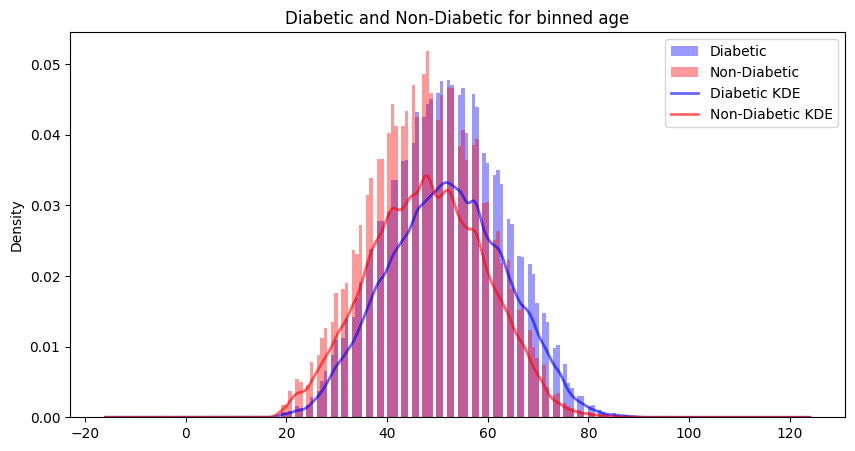

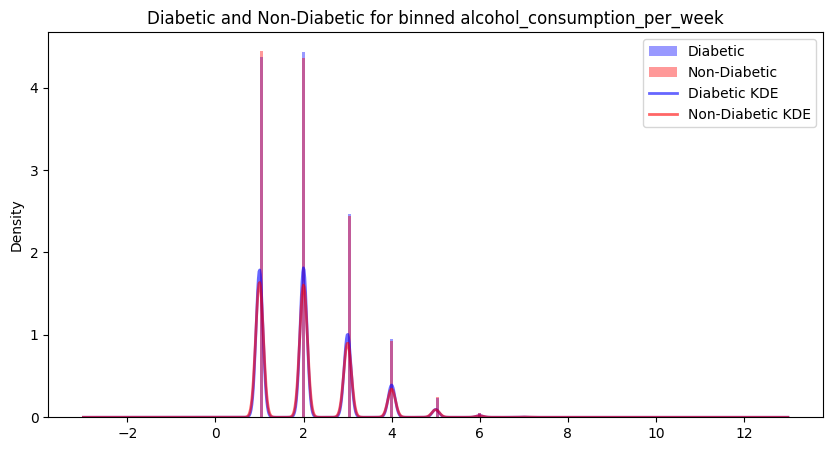

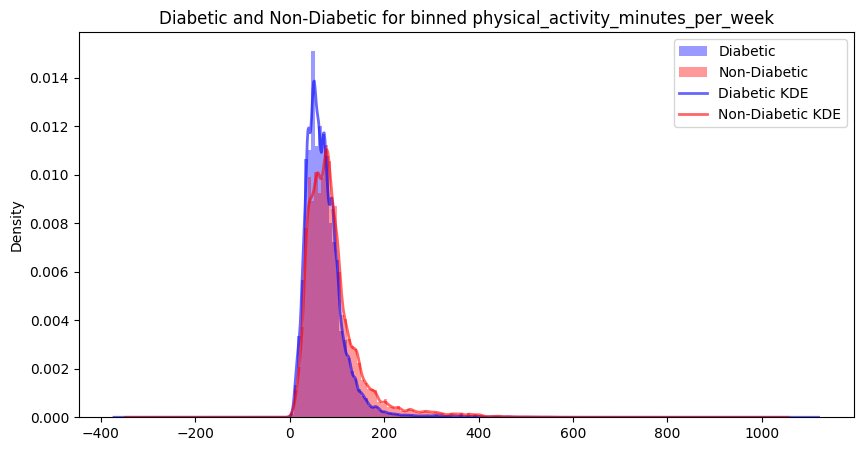

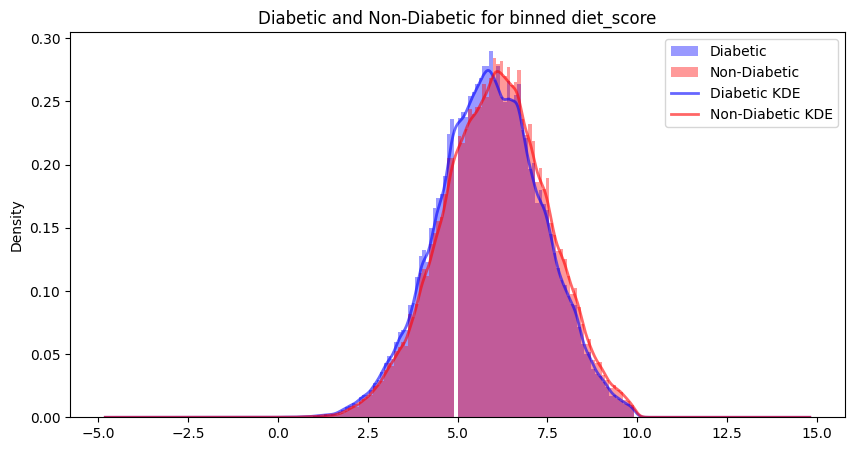

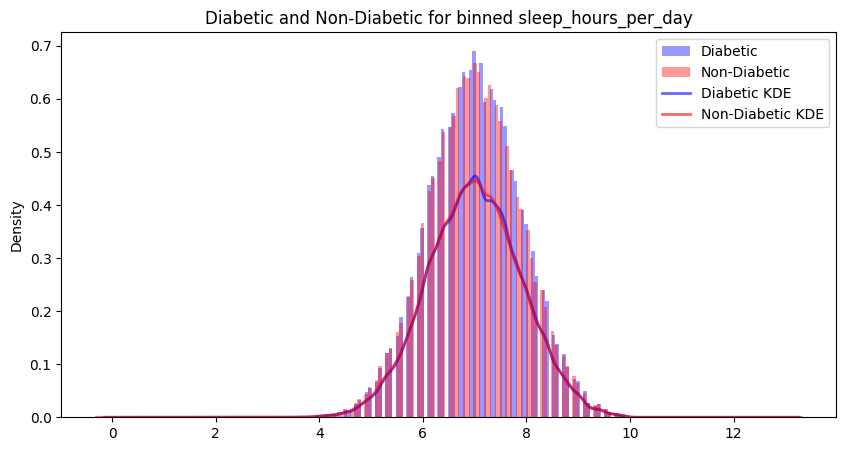

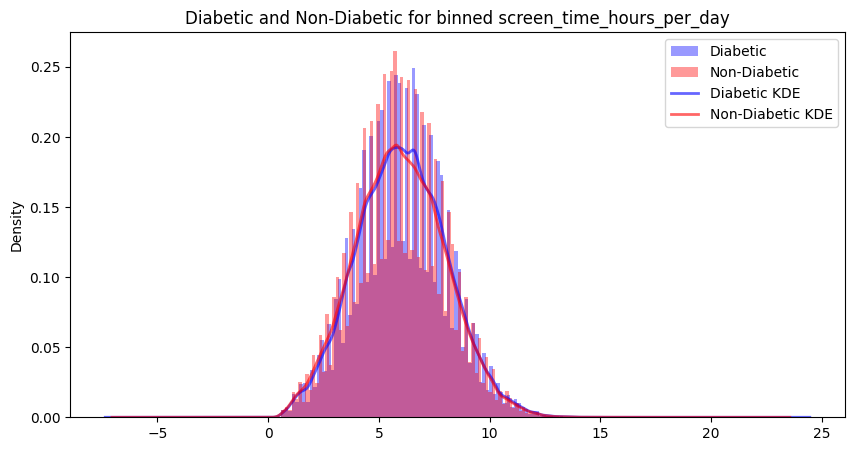

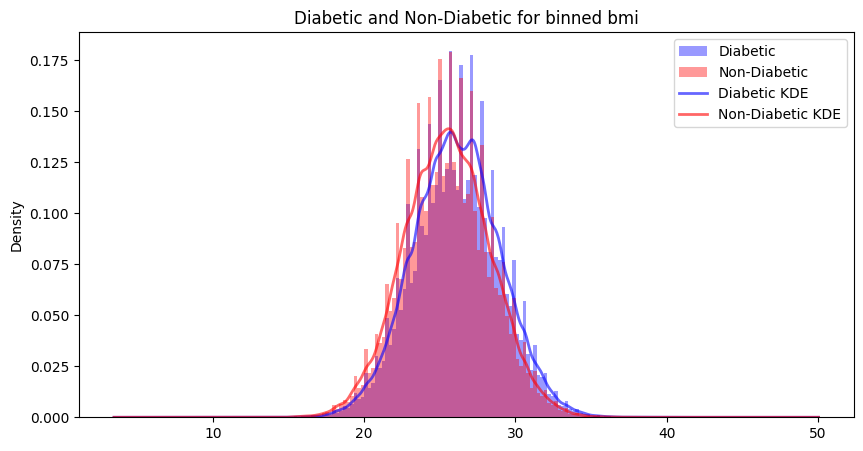

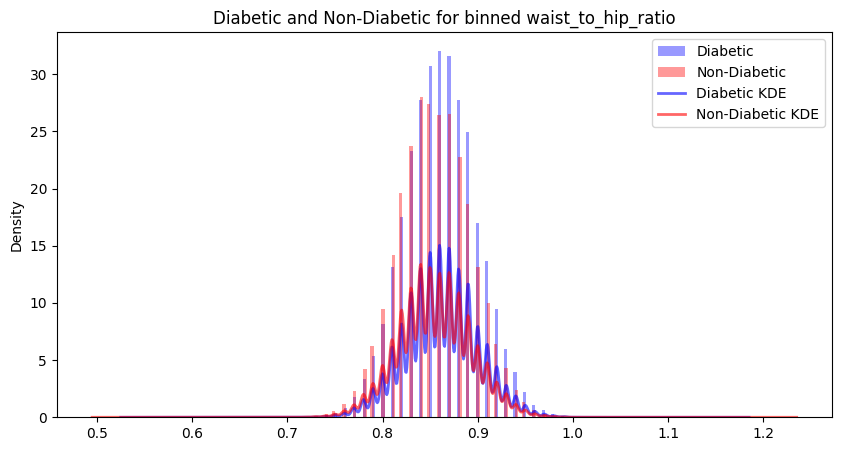

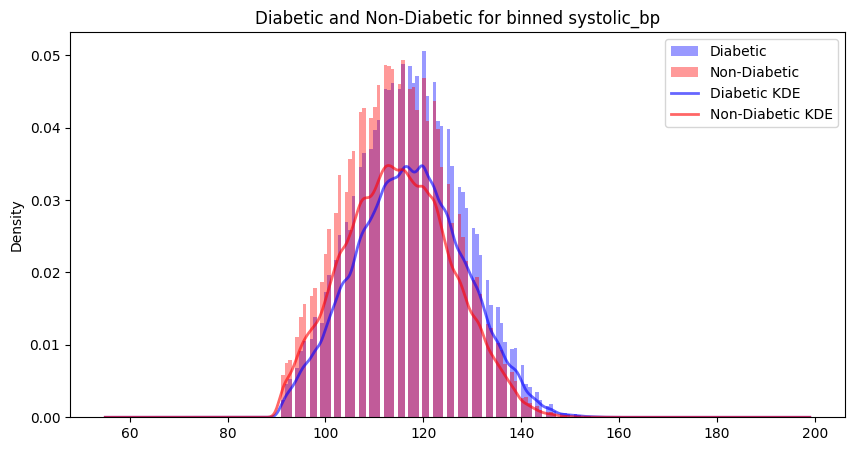

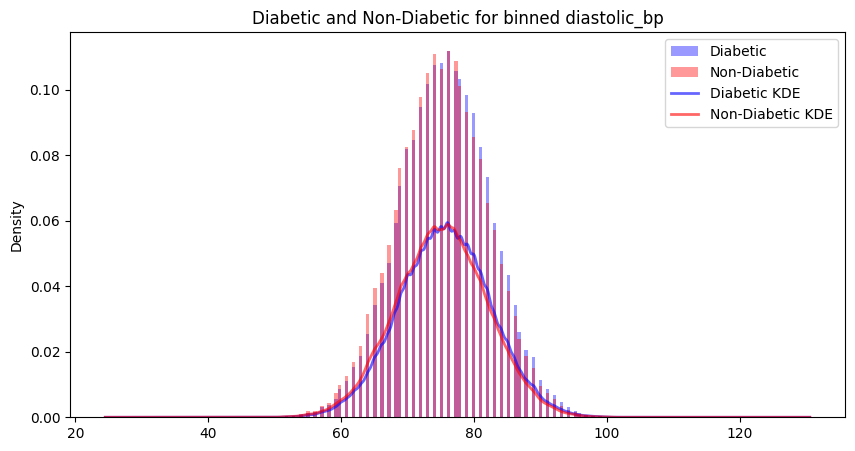

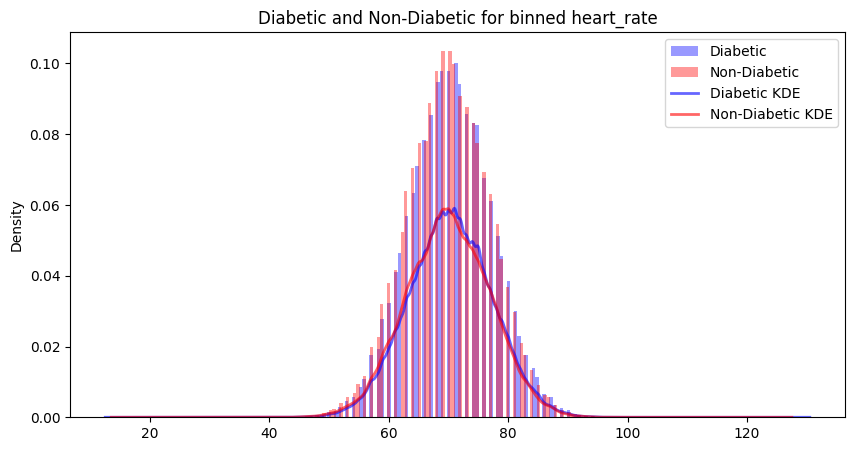

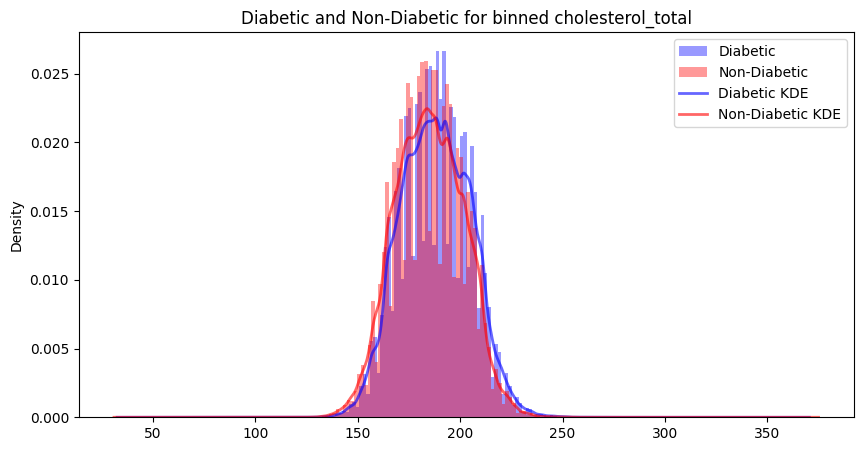

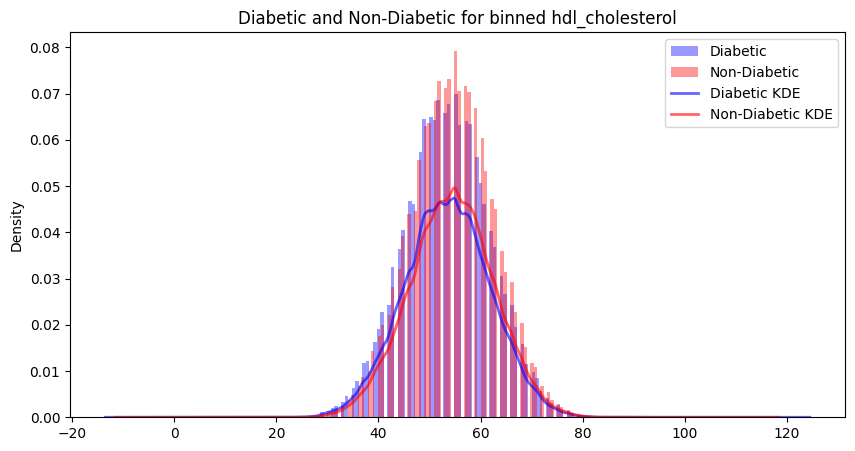

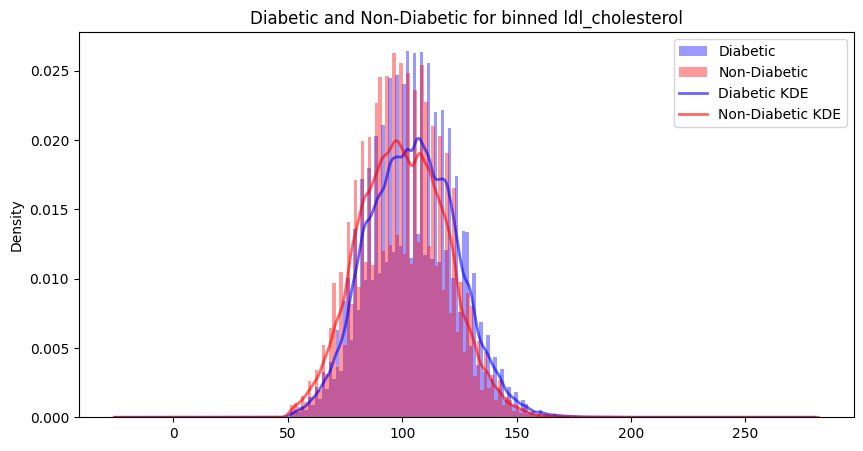

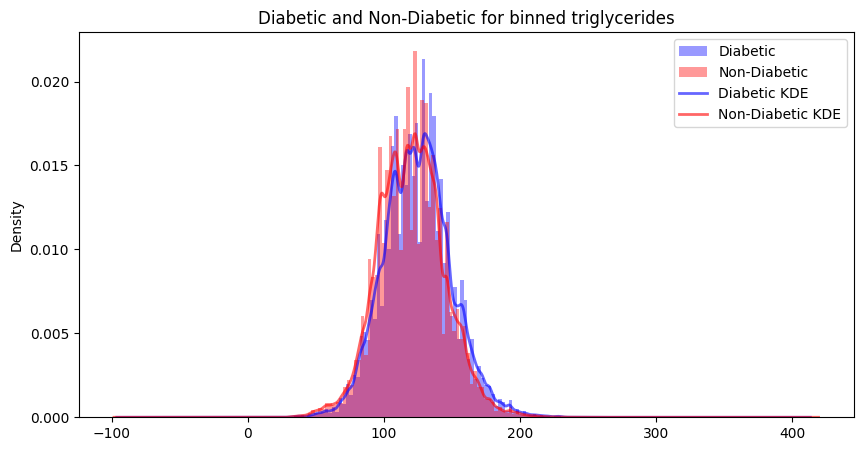

In [ ]:
if not KAGGLE:
    for feature in numerical_features:
        fig, axes = plt.subplots(figsize=(10, 5))

        #Plot for diabetic vs non-diabetic
        axes.hist(data=is_diabetic_df, x=feature, bins=100, color='blue', alpha=0.4, label='Diabetic', density=True)
        axes.hist(data=non_diabetic_df, x=feature, bins=100, color='red', alpha=0.4, label='Non-Diabetic', density=True)
        is_diabetic_df[feature].plot(kind='density', ax=axes, linewidth=2, color='blue', alpha=0.6, label='Diabetic KDE')
        non_diabetic_df[feature].plot(kind='density', ax=axes, linewidth=2, color='red', alpha=0.6, label='Non-Diabetic KDE')
        axes.legend()
        axes.set_title(f'Diabetic and Non-Diabetic for binned {feature}')

        plt.show()

In [67]:
try:
    train_df = train_df.drop(columns=categories, axis=1)
except KeyError:
    print('Columns already removed\n')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 38 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  float64
 3   physical_activity_minutes_per_week  700000 non-null  float64
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

### Polynomial Features

In [68]:
x_poly = PolynomialFeatures(degree=2)
new_x = x_poly.fit_transform(train_df.drop(columns=['diagnosed_diabetes']))
new_feature_columns = x_poly.get_feature_names_out()

new_poly_df = pd.DataFrame(new_x, columns=new_feature_columns)
new_poly_df['diagnosed_diabetes'] = train_df['diagnosed_diabetes']
train_df = new_poly_df.copy(deep=True)
train_df

1        id   age  alcohol_consumption_per_week  \
0       1.0       0.0  31.0                      0.693147   
1       1.0       1.0  50.0                      1.098612   
2       1.0       2.0  32.0                      1.386294   
3       1.0       3.0  54.0                      1.386294   
4       1.0       4.0  54.0                      0.693147   
...     ...       ...   ...                           ...   
699995  1.0  699995.0  29.0                      0.693147   
699996  1.0  699996.0  46.0                      1.098612   
699997  1.0  699997.0  35.0                      0.693147   
699998  1.0  699998.0  49.0                      1.098612   
699999  1.0  699999.0  42.0                      1.609438   

        physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  \
0                                 3.828641         7.7                  6.8   
1                                 4.304065         5.7                  6.5   
2                                 5.068904         8.5                  7.4   
3                                 4.356709         4.6                  7.0   
4                                 4.025352         5.7                  6.2   
...                                    ...         ...                  ...   
699995                            4.094345         6.9                  5.2   
699996                            4.290459         7.7                  7.7   
699997                            3.931826         5.6                  6.1   
699998                            4.262680         5.7                  6.9   
699999                            4.043051         4.2                  7.0   

        screen_time_hours_per_day   bmi  waist_to_hip_ratio  systolic_bp  \
0                             6.1  33.4                0.93        112.0   
1                             5.8  23.8                0.83        120.0   
2                             9.1  24.1                0.83         95.0   
3                             9.2  26.6                0.83        121.0   
4                             5.1  28.8                0.90        108.0   
...                           ...   ...                 ...          ...   
699995                        1.5  26.1                0.88        133.0   
699996                        3.8  25.5                0.85        106.0   
699997                        6.4  26.9                0.88        127.0   
699998                        4.7  25.2                0.86        116.0   
699999                        6.1  28.3                0.90         99.0   

        diastolic_bp  heart_rate  cholesterol_total  hdl_cholesterol  \
0               70.0        62.0              199.0             58.0   
1               77.0        71.0              199.0             50.0   
2               89.0        73.0              188.0             59.0   
3               69.0        74.0              182.0             54.0   
4               60.0        85.0              206.0             49.0   
...              ...         ...                ...              ...   
699995          57.0        69.0              163.0             58.0   
699996          85.0        65.0              188.0             45.0   
699997          84.0        63.0              168.0             59.0   
699998          67.0        69.0              198.0             55.0   
699999          73.0        74.0              191.0             63.0   

        ldl_cholesterol  triglycerides  family_history_diabetes  \
0                 114.0          102.0                      0.0   
1                 121.0          124.0                      0.0   
2                 114.0          108.0                      0.0   
3                  85.0          123.0                      0.0   
4                 131.0          124.0                      0.0   
...                 ...            ...                      ...   
699995             90.0          126.0                      0.0   
699996        

In [108]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Columns: 742 entries, 1 to diagnosed_diabetes
dtypes: float64(742)
memory usage: 3.9 GB


### DType conversion

In [ ]:
# train_df = train_df.select_dtypes(include=['float16']).astype('float64')

In [ ]:
# train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Columns: 742 entries, 1 to diagnosed_diabetes
dtypes: float16(742)
memory usage: 990.7 MB


In [70]:
#scale our data down
standard_scaler = StandardScaler()
scaled_train_df = pd.DataFrame(
    standard_scaler.fit_transform(train_df.drop(columns=['diagnosed_diabetes'])),
    columns=train_df.drop(columns=['diagnosed_diabetes']).columns
)
scaled_train_df['diagnosed_diabetes'] = train_df['diagnosed_diabetes']
train_df = scaled_train_df.copy(deep=True)

### Graphing Scaled Data

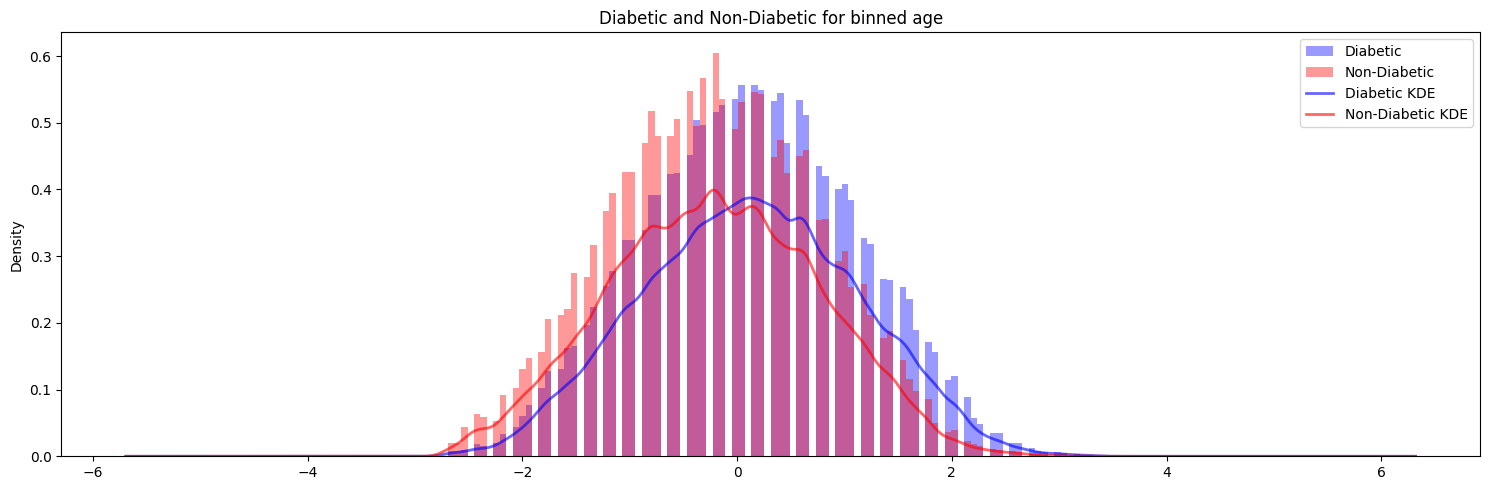

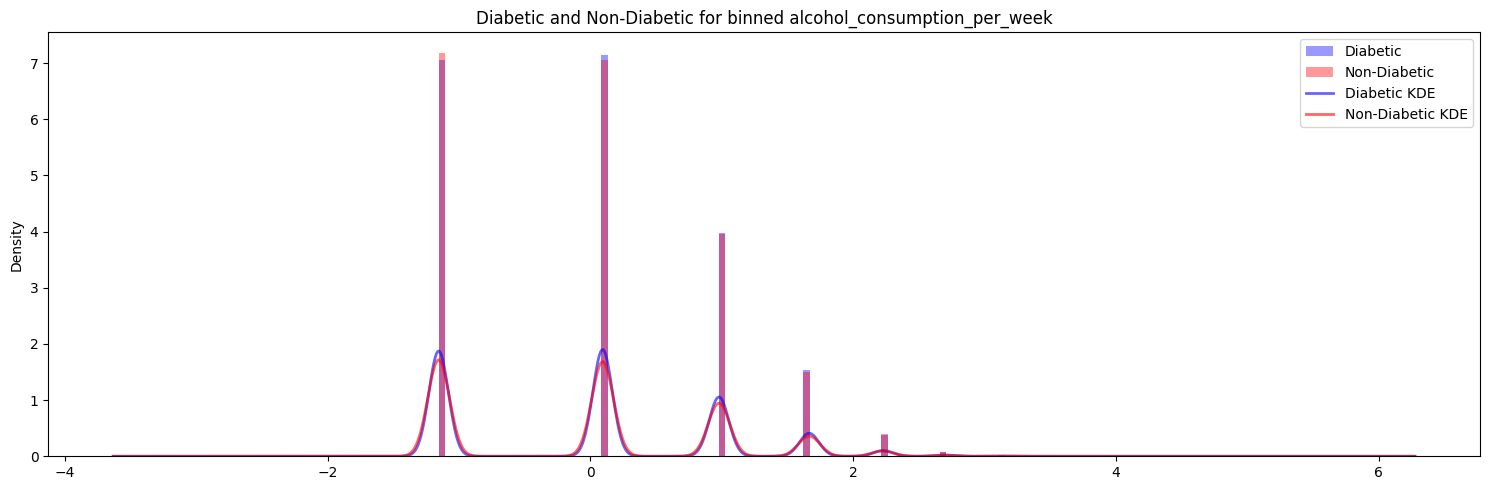

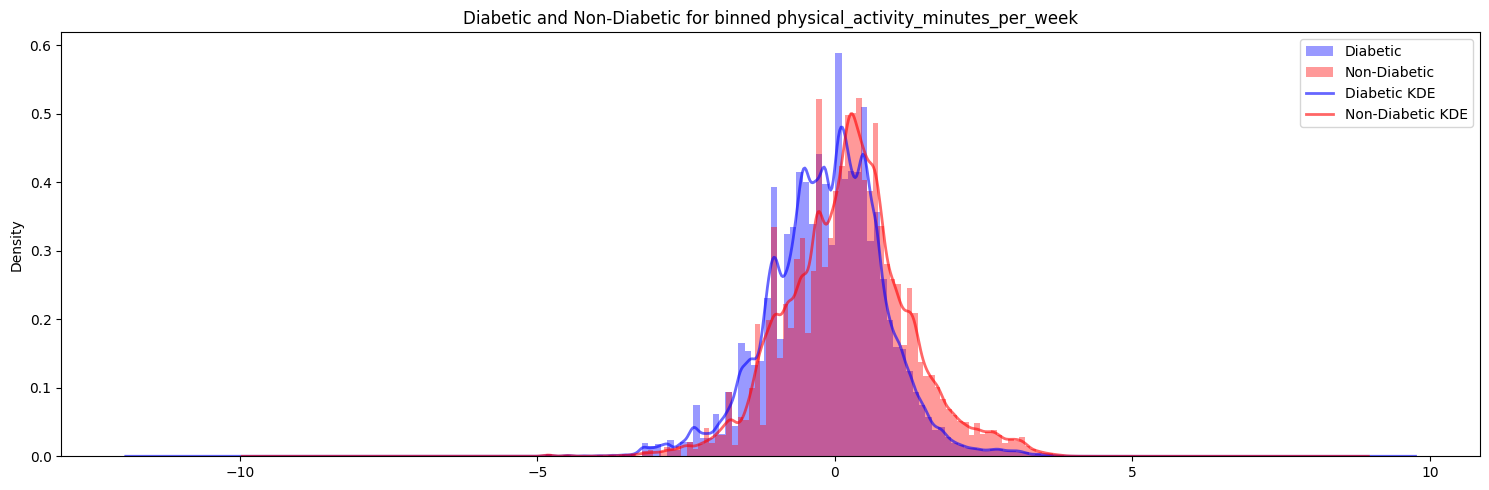

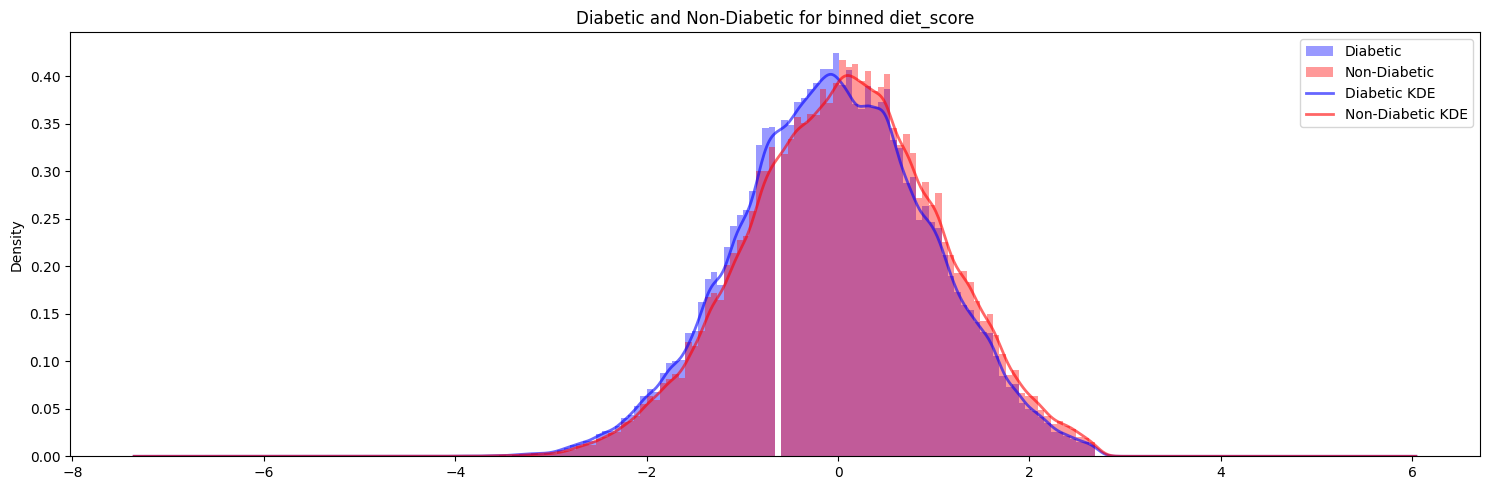

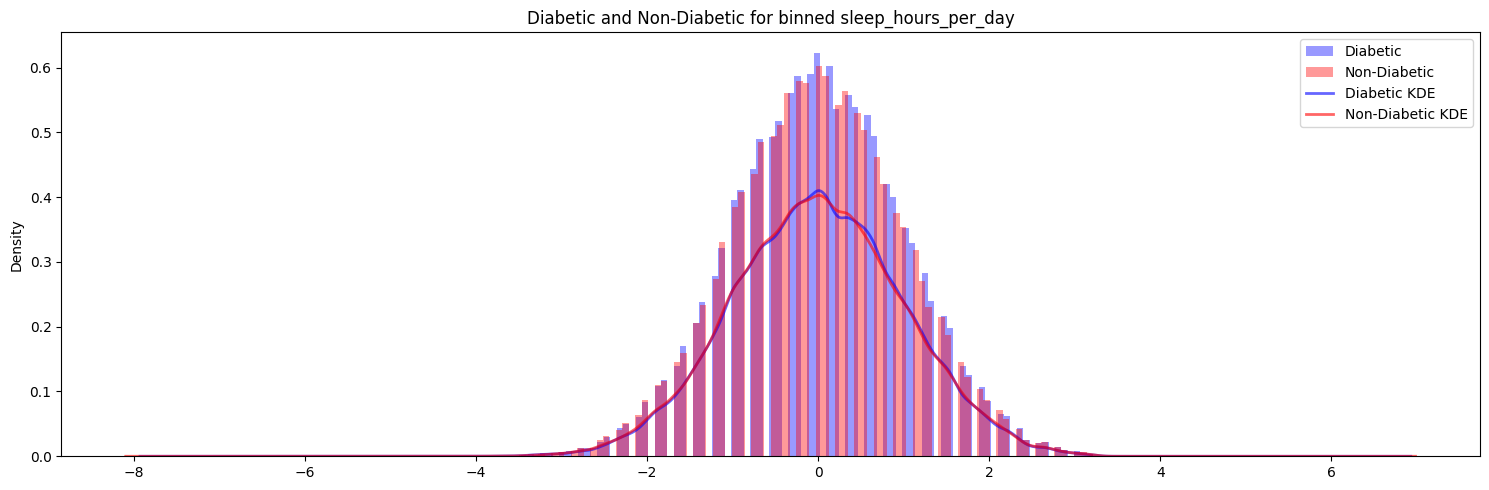

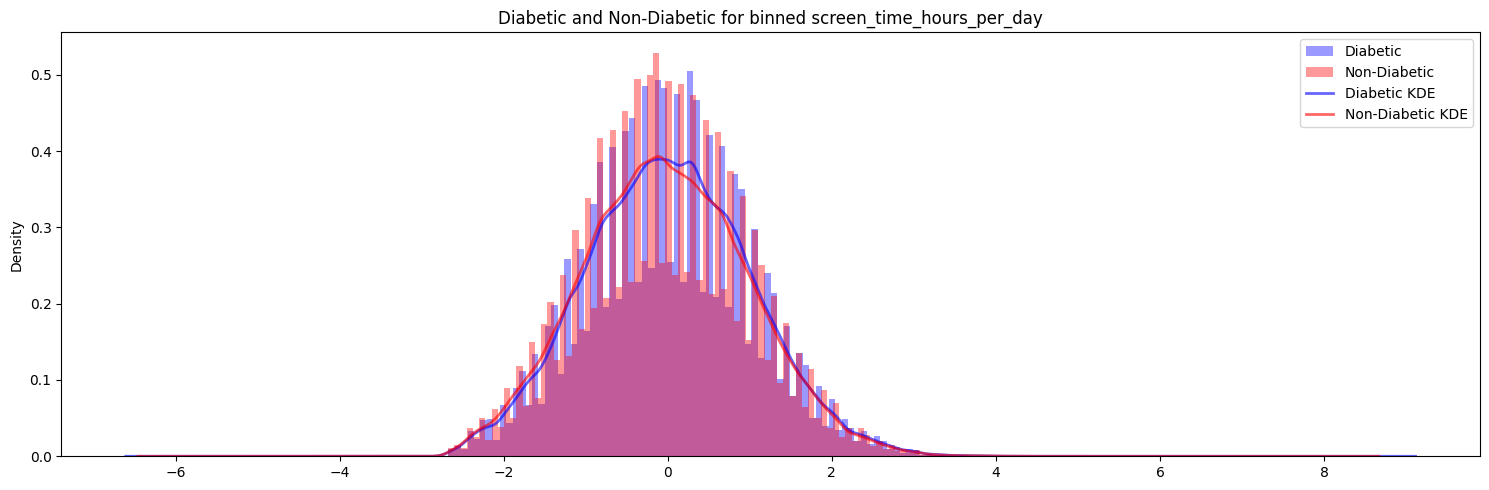

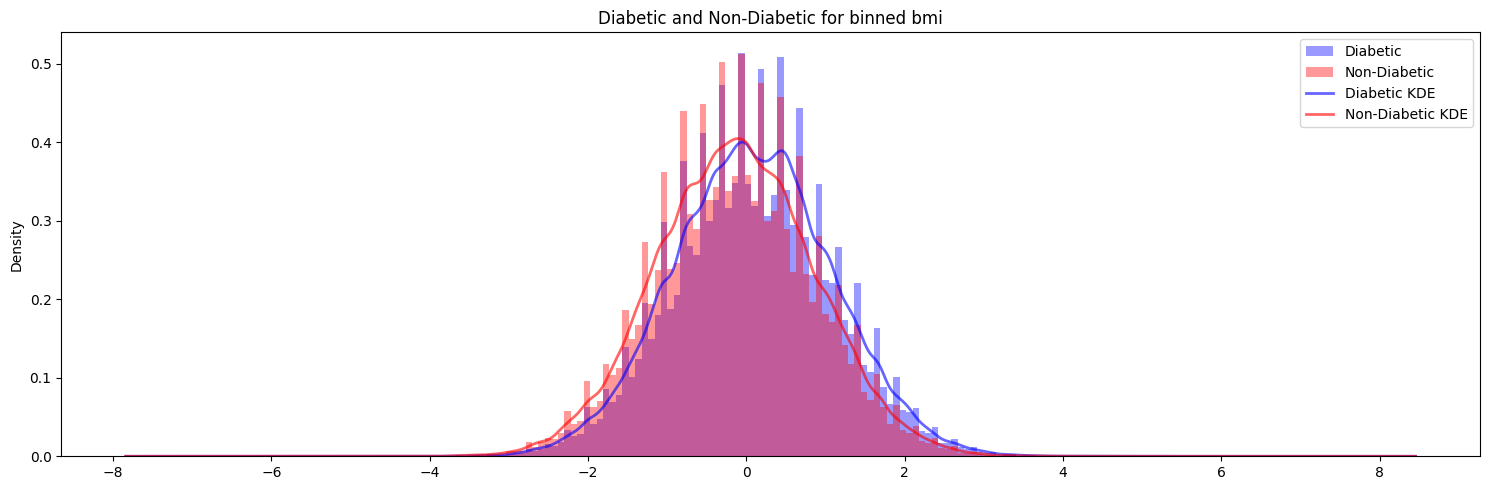

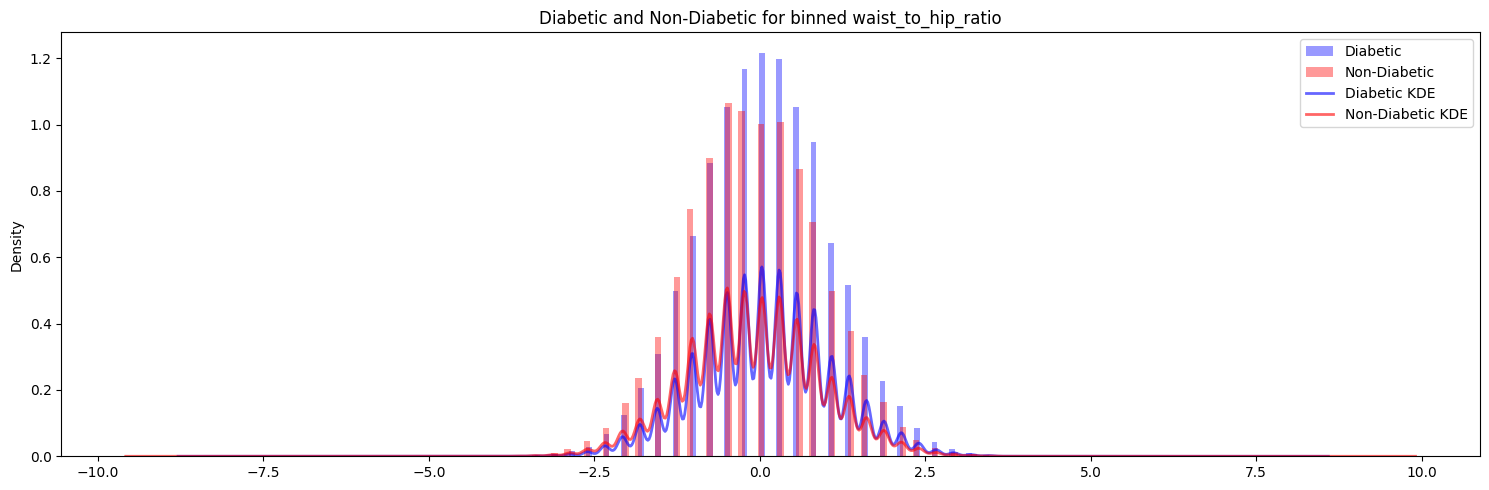

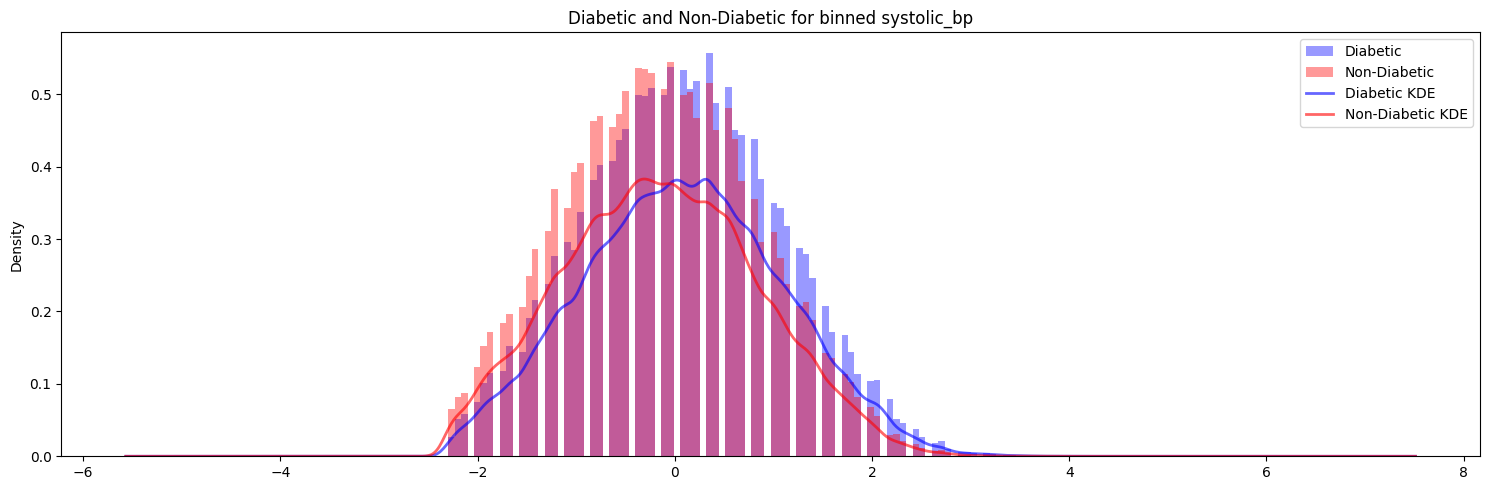

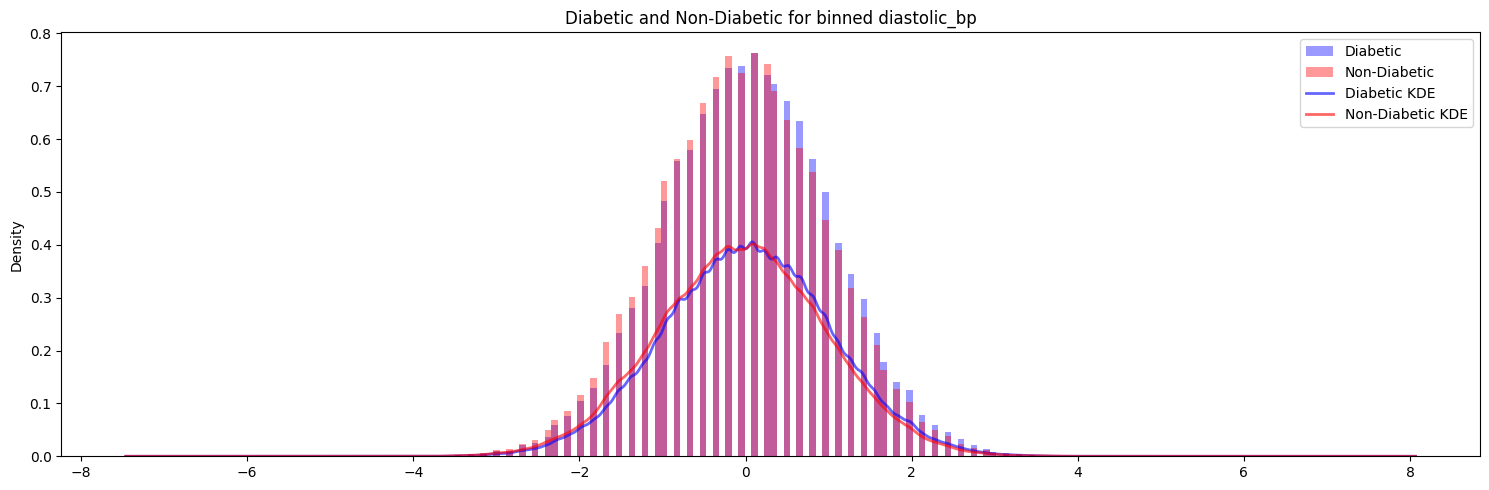

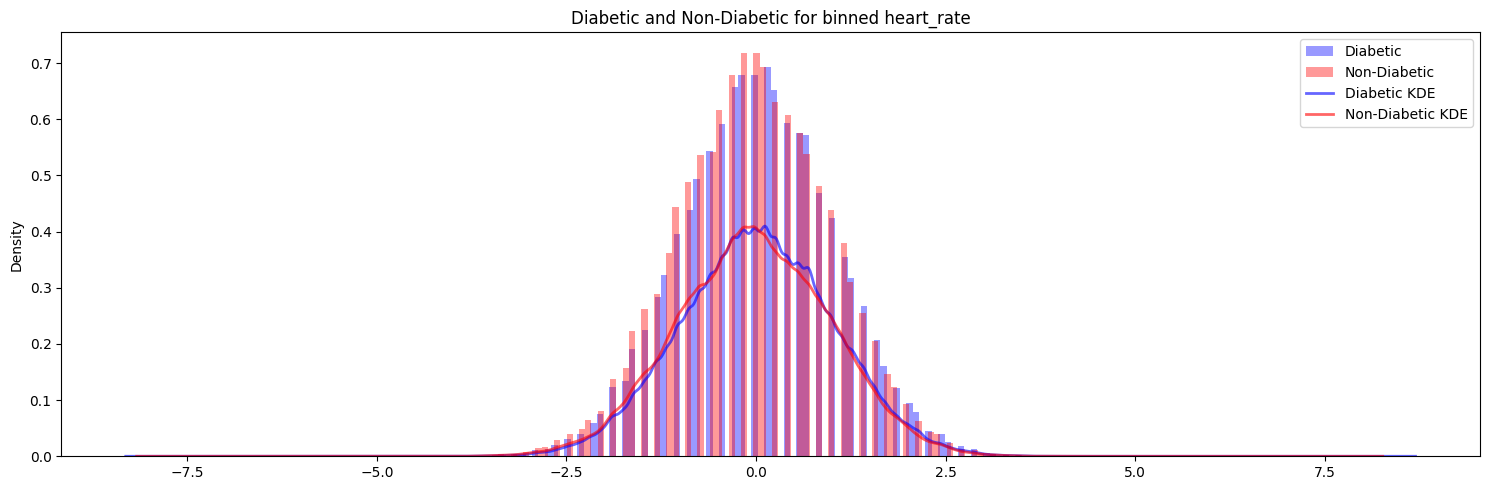

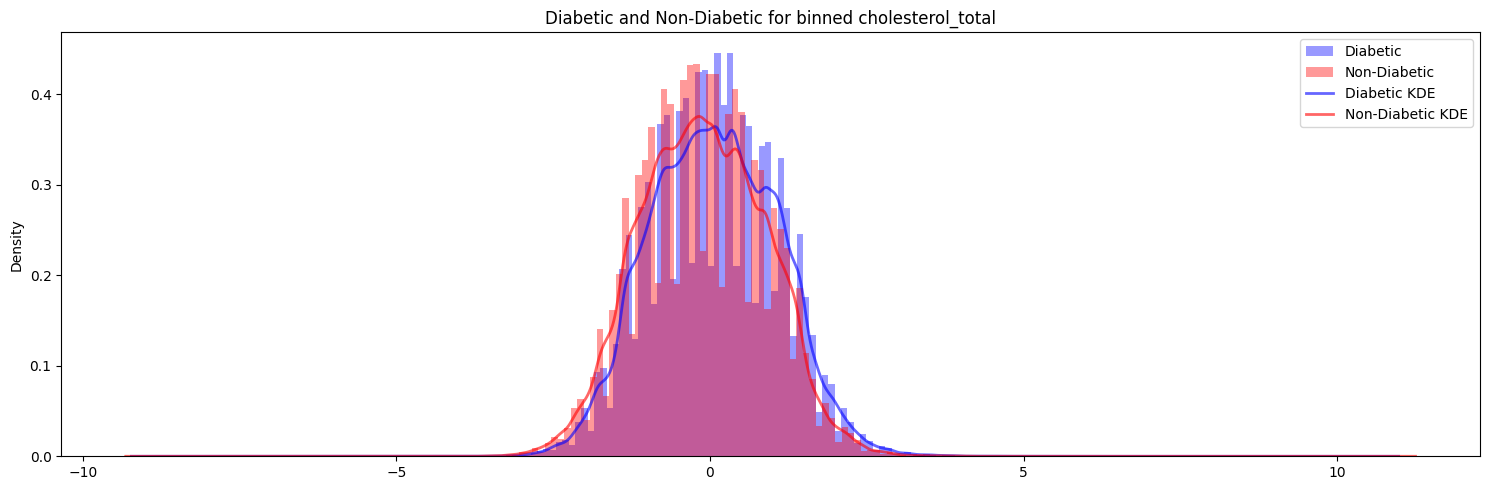

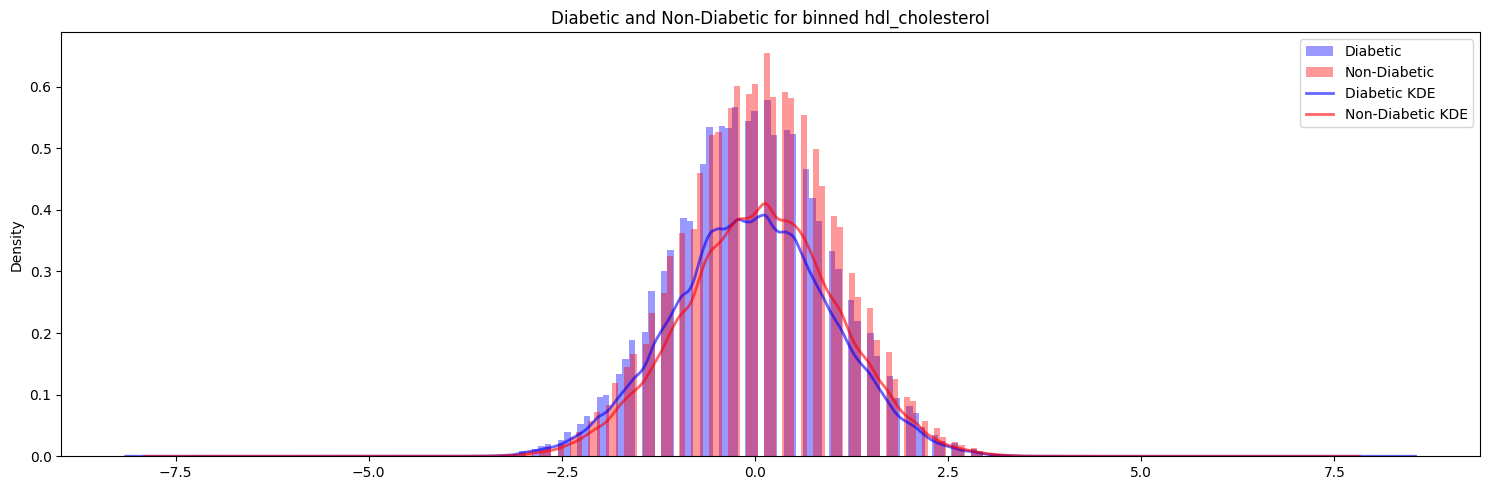

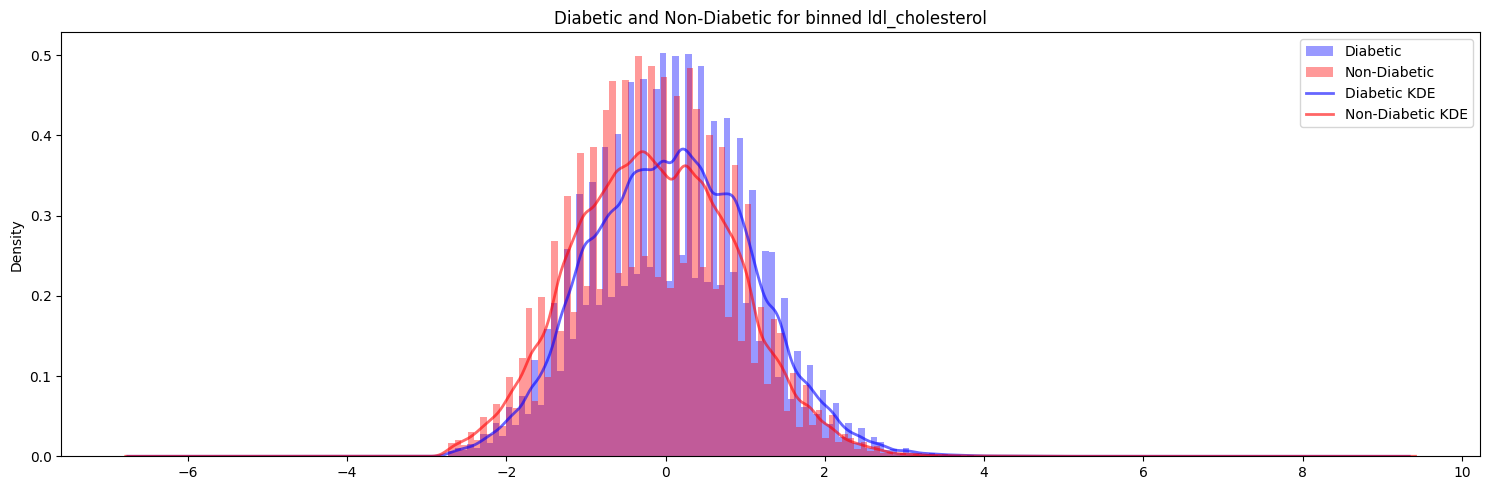

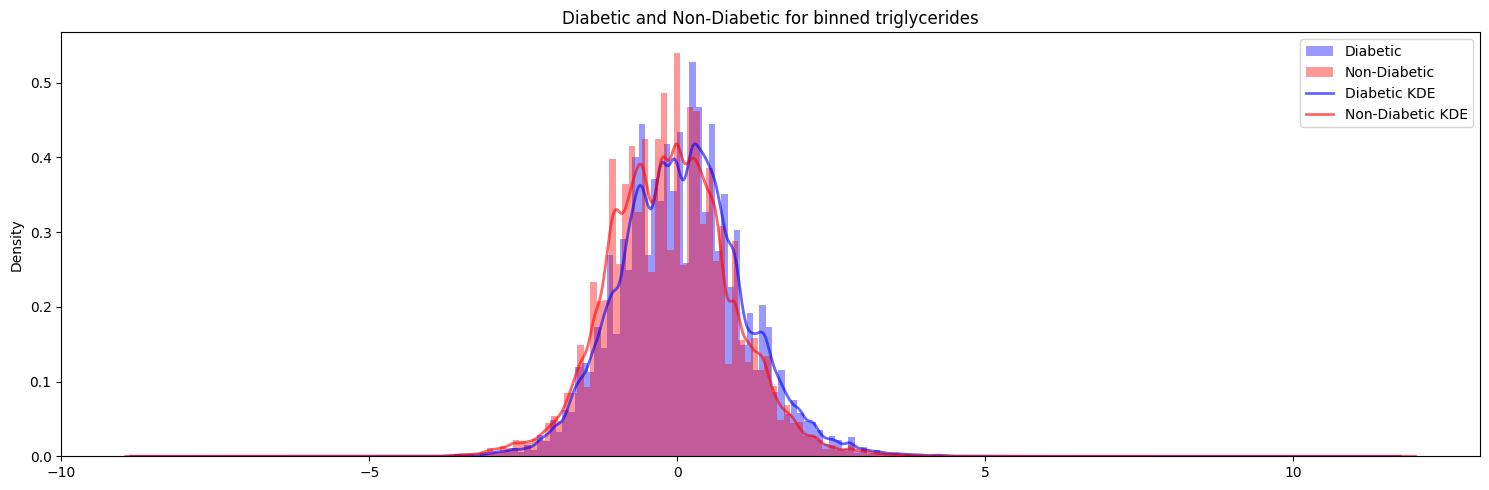

In [ ]:
if not KAGGLE:
    #compare diabetics to non-diabetics 
    is_diabetic_df = train_df[train_df['diagnosed_diabetes'] == 1]
    non_diabetic_df = train_df[train_df['diagnosed_diabetes'] == 0]

    for feature in numerical_features:
        fig, axes = plt.subplots(figsize=(15, 5))

        #Plot for diabetic vs non-diabetic
        axes.hist(data=is_diabetic_df, x=feature, bins=100, color='blue', alpha=0.4, label='Diabetic', density=True)
        axes.hist(data=non_diabetic_df, x=feature, bins=100, color='red', alpha=0.4, label='Non-Diabetic', density=True)
        is_diabetic_df[feature].plot(kind='density', ax=axes, linewidth=2, color='blue', alpha=0.6, label='Diabetic KDE')
        non_diabetic_df[feature].plot(kind='density', ax=axes, linewidth=2, color='red', alpha=0.6, label='Non-Diabetic KDE')
        axes.legend()

        axes.set_title(f'Diabetic and Non-Diabetic for binned {feature}')

        plt.tight_layout()
        plt.show()

## 3. Model building

In [137]:
train_df

1        id       age  alcohol_consumption_per_week  \
0       0.0 -1.732422 -1.661133                     -1.154297   
1       0.0 -1.732422 -0.030869                      0.093140   
2       0.0 -1.732422 -1.575195                      0.978516   
3       0.0 -1.732422  0.312256                      0.978516   
4       0.0 -1.732422  0.312256                     -1.154297   
...     ...       ...       ...                           ...   
699995  0.0  1.732422 -1.833008                     -1.154297   
699996  0.0  1.732422 -0.374023                      0.093140   
699997  0.0  1.732422 -1.317383                     -1.154297   
699998  0.0  1.732422 -0.116638                      0.093140   
699999  0.0  1.732422 -0.717285                      1.665039   

        physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  \
0                                -0.762695    1.186523            -0.224243   
1                                 0.106689   -0.180176            -0.556641   
2                                 1.505859    1.733398             0.441162   
3                                 0.203003   -0.932129            -0.002439   
4                                -0.403076   -0.180176            -0.889648   
...                                    ...         ...                  ...   
699995                           -0.276855    0.639648            -1.998047   
699996                            0.081787    1.186523             0.773926   
699997                           -0.574219   -0.248535            -1.000000   
699998                            0.030975   -0.180176            -0.113342   
699999                           -0.370850   -1.205078            -0.002439   

        screen_time_hours_per_day       bmi  waist_to_hip_ratio  systolic_bp  \
0                        0.043152  2.630859            1.875977    -0.389893   
1                       -0.105164 -0.725098           -0.757324     0.336670   
2                        1.526367 -0.620605           -0.757324    -1.933594   
3                        1.576172  0.253662           -0.757324     0.427490   
4                       -0.451172  1.022461            1.085938    -0.753418   
...                           ...       ...                 ...          ...   
699995                  -2.230469  0.078735            0.559082     1.517578   
699996                  -1.093750 -0.130981           -0.230835    -0.935059   
699997                   0.191406  0.358398            0.559082     0.972168   
699998                  -0.648926 -0.235840            0.032501    -0.026718   
699999                   0.043152  0.847656            1.085938    -1.570312   

        diastolic_bp  heart_rate  cholesterol_total  hdl_cholesterol  \
0          -0.796875   -1.176758           0.728027         0.505371   
1           0.228394    0.119934           0.728027        -0.462402   
2           1.986328    0.408203           0.070618         0.626465   
3          -0.943848    0.552246          -0.288086         0.021393   
4          -2.261719    2.136719           1.146484        -0.583496   
...              ...         ...                ...              ...   
699995     -2.701172   -0.168335          -1.423828         0.505371   
699996      1.400391   -0.744629           0.070618        -1.067383   
699997      1.253906   -1.033203          -1.125000         0.626465   
699998     -1.236328   -0.168335           0.668457         0.142334   
699999     -0.357666    0.552246           0.249878         1.110352   

        ldl_cholesterol  triglycerides  family_history_diabetes  \
0              0.583008      -0.852051                -0.419189   
1              0.951172       0.037109                -0.419189   
2              0.583008      -0.609863                -0.419189   
3             -0.941406      -0.003309                -0.419189   
4              1.476562       0.037109                -0.419189   
...                 ...            ...              

In [83]:
test_df

id  age  alcohol_consumption_per_week  \
0       700000   45                             4   
1       700001   35                             1   
2       700002   45                             1   
3       700003   55                             2   
4       700004   77                             2   
...        ...  ...                           ...   
299995  999995   59                             3   
299996  999996   50                             2   
299997  999997   63                             1   
299998  999998   48                             3   
299999  999999   47                             1   

        physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  \
0                                      100         4.3                  6.8   
1                                       87         3.5                  4.6   
2                                       61         7.6                  6.8   
3                                       81         7.3                  7.3   
4                                       29         7.3                  7.6   
...                                    ...         ...                  ...   
299995                                 185         6.3                  7.3   
299996                                  25         5.8                  7.8   
299997                                 252         5.2                  7.5   
299998                                  72         4.9                  6.9   
299999                                  75         5.1                  8.0   

        screen_time_hours_per_day   bmi  waist_to_hip_ratio  systolic_bp  \
0                             6.2  25.5                0.84          123   
1                             9.0  28.6                0.88          120   
2                             7.0  28.5                0.94          112   
3                             5.0  26.9                0.91          114   
4                             8.5  22.0                0.83          131   
...                           ...   ...                 ...          ...   
299995                        4.4  22.8                0.81          108   
299996                        4.5  29.6                0.93          112   
299997                        8.5  25.1                0.77          129   
299998                        1.8  27.7                0.89          121   
299999                        2.5  26.1                0.84          132   

        diastolic_bp  heart_rate  cholesterol_total  hdl_cholesterol  \
0                 70          64                209               55   
1                 74          59                159               47   
2                 71          75                173               43   
3                 81          61                203               59   
4                 78          79                177               59   
...              ...         ...                ...              ...   
299995            75          64                189               54   
299996            70          78                158               43   
299997            63          57                168               33   
299998            67          86                171               50   
299999            70          87                193               46   

        ldl_cholesterol  triglycerides  gender ethnicity education_level  \
0                   135            111  Female     White      Highschool   
1                    83            145  Female     White      Highschool   
2                    99            184    Male     White      Highschool   
3                   116            128    Male     White        Graduate   
4                    87            133    Male     White        Graduate   
...                 ...            ...     ...       ...             ...   
299995               96            126    Male     White      Highschool   
299996               84            112  

In [139]:
#Split our test and targets into dataframes
X = train_df.drop(columns=['diagnosed_diabetes'])
Y = train_df['diagnosed_diabetes']

In [140]:
results = {
    'model': [],
    'score': []
}

test_scores = {
    'model': [],
    'score': []
}

cv_folds = 10

#Sample our data since we have such a large dataset
#Increase this number as you see fit (LOAD TIMES WILL INCREASE!)
sample_size = 10000

X_train, X_test, Y_train, Y_test = train_test_split(X.sample(sample_size), Y.sample(sample_size),  test_size=0.2, random_state=852, shuffle=True)

# print the shape of your datasets
print('Shape of X_train: ',X_train.shape)
print('Shape of X_test: ',X_test.shape)
print('Shape of y_train: ',Y_train.shape)
print('Shape of y_test: ',Y_test.shape)

Shape of X_train:  (8000, 741)
Shape of X_test:  (2000, 741)
Shape of y_train:  (8000,)
Shape of y_test:  (2000,)


### Linear Regression

In [141]:
#Considering pearson correlation gave us higher correlation coefficients lets use linear regression to start
linear_model = LinearRegression()

scores = cross_val_score(linear_model, X_train, Y_train, cv=cv_folds, scoring='neg_root_mean_squared_error')
results['model'].extend(['Linear Regression'] * cv_folds)
results['score'].extend(-scores)

linear_model.fit(X_train, Y_train)

test_predictions = linear_model.predict(X_test)

test_scores['model'].append(0)
test_scores['score'].append(root_mean_squared_error(Y_test, test_predictions))

print(f'Mean cross-validated RMSE: {np.mean(-scores):.4f}')

Mean cross-validated RMSE: 0.5617


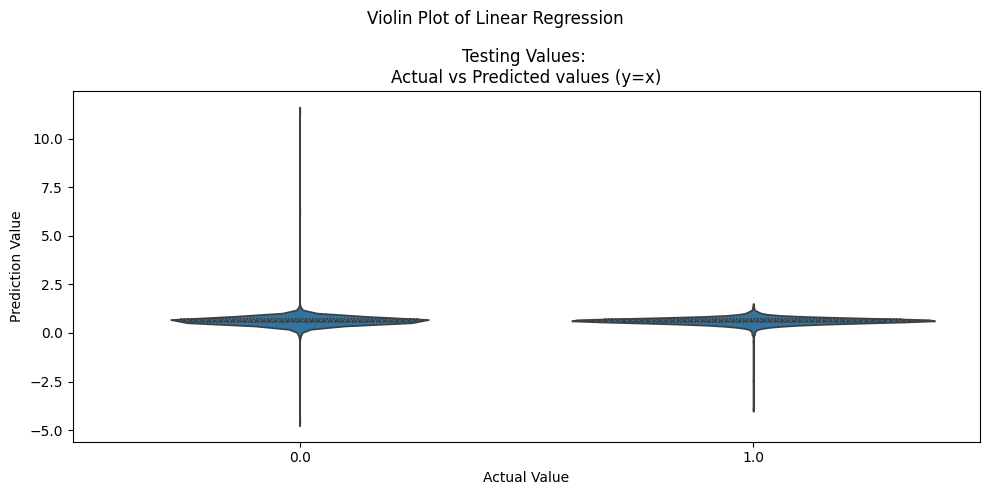

In [142]:
#Plot testing actual values (Y_test) vs testing predicted values (test_predictions)
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

linear_df = pd.DataFrame({
    'True':Y_test,
    'Predicted': test_predictions
})

sns.violinplot(data=linear_df, x='True', y='Predicted', inner='quartile', ax=axes)
axes.set_title(f'Testing Values: \nActual vs Predicted values (y=x)')
axes.set_xlabel('Actual Value')
axes.set_ylabel('Prediction Value')

plt.suptitle('Violin Plot of Linear Regression')
plt.tight_layout()
plt.show()

### Logistic Regression

In [ ]:
#Logistic Regression was not very good at first glance. Move on to what should be better, LogisticRegression for binary classifications
logistic_model = LogisticRegression(random_state=852, max_iter=1000, class_weight='balanced')

logistic_scores = cross_validate(logistic_model, X_train, Y_train, cv=cv_folds, scoring=['roc_auc', 'f1'])
results['model'].extend(['Logistic Regression'] * cv_folds)
results['score'].extend(logistic_scores)

logistic_model.fit(X_train, Y_train)

logistic_test_preds = logistic_model.predict(X_test)

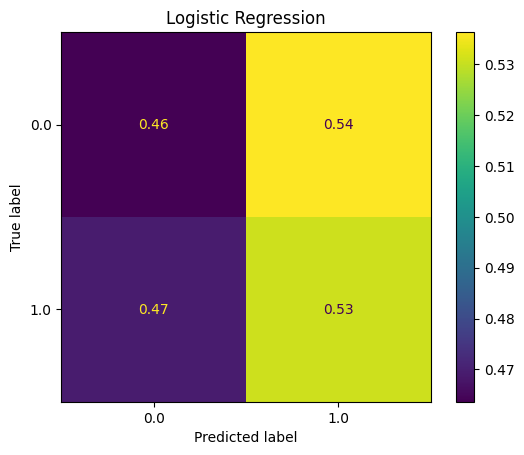

In [155]:
#Plot our logistic regression
# cm = confusion_matrix(Y_test, logistic_test_preds)
ConfusionMatrixDisplay.from_predictions(
    Y_test,
    logistic_test_preds,
    normalize='true'
)

plt.title('Logistic Regression')

plt.show()

## 4. Model evaluation

In [8]:
# Your code here...

## 5. Submission

In [9]:
# Make random predictions for submission by sampling from the training labels
# Note: Replace this with your model's predictions!
predictions = train_df['diagnosed_diabetes'].sample(n=test_df.shape[0], random_state=42).astype(int)
prediction_ids = test_df['id'].astype(int)

# Create submission DataFrame with required format: id, diagnosed_diabetes
submission_df = pd.DataFrame({
    'id': prediction_ids.values,
    'diagnosed_diabetes': predictions.values
})

# Determine output path based on environment
if KAGGLE:

    # On Kaggle, save to current directory for submission
    submission_file = 'submission.csv'

else:

    # Locally, save to ../data/ directory
    # Create directory if it doesn't exist
    data_dir = Path('../data')
    data_dir.mkdir(parents=True, exist_ok=True)
    submission_file = data_dir / 'submission.csv'

# Save submission file and display preview
submission_df.to_csv(submission_file, index=False)
submission_df.head()

id  diagnosed_diabetes
0  700000                   1
1  700001                   0
2  700002                   1
3  700003                   1
4  700004                   0